In [1]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np
import gzip
import math

In [2]:
# mpl.rcParams['text.usetex']=True
# mpl.rcParams['text.latex.unicode']=True
# mpl.rc('font', family='DejaVu Sans', serif='cm10')
#plt.rc('text', usetex=True)

In [2]:
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 30
mpl.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['xtick.minor.size'] = 9
plt.rcParams['ytick.major.size'] = 16
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.minor.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.minor.width'] = 2.5
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.pad'] = 9
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
plt.rcParams['axes.titlesize'] = 30
plt.rcParams.update({'font.size': 30})

In [5]:
#fullmergedf.to_csv('fullmergePAB.csv',index=False)

In [3]:
pabdatazcut = fits.open('pabdatazcut.fits')
sortedpab = sorted(pabdatazcut[1].data , key = lambda data: data['PAB_FLUX'] , reverse = True )

data_dict= dict()
for obj in sortedpab:
    for key in ['FIELD', 'ID', 'RA', 'DEC' , 'Z_50', 'Z_84','Z_16' , 'PAB_FLUX', 'PAB_FLUX_ERR']:
        data_dict.setdefault(key, list()).append(obj[key])

sortedpabdf = pd.DataFrame(data_dict)
sortedpabdf['Z_ERR']= ((sortedpabdf['Z_84'] - sortedpabdf['Z_50']) + (sortedpabdf['Z_50'] - sortedpabdf['Z_16'])) / (2 * sortedpabdf['Z_50'])
sortedpabdf['OBS_PAB'] = 12820 * (1 + sortedpabdf['Z_50'])
sortedpabdf.loc[sortedpabdf['FIELD'] == "ERS" , 'FIELD'] = "ERSPRIME"
sortedpabdf = sortedpabdf[['FIELD' , 'ID' , 'RA' , 'DEC' , 'Z_50' , 'Z_ERR' , 'PAB_FLUX' , 'PAB_FLUX_ERR' , 'OBS_PAB']]

In [4]:
good = [6 , 9 , 12 , 14 , 15 , 18 , 21 , 24 , 29 , 30 , 35 , 36 , 37 , 46 , 48 , 51 , 52 , 55 , 58 , 70 , 71 , 72 , 74 , 75 , 78 , 80 , 81 , 84 , 89 , 97 , 98 , 102 ,  112 , 118 , 119 , 120 , 125 , 126 , 128 , 129 , 132 , 138 , 147 , 148 , 150 , 158 , 159 , 160 , 163 , 166 , 181 , 184 , 186 , 189 , 193 , 194 , 196 , 206 , 213 , 215 , 235 , 244 , 257 , 259 , 265 , 275 , 280 , 284 , 285 , 290 , 306 , 319 , 326 , 339 , 347 , 365 ]
gooddf50 = sortedpabdf.loc[good]

GNdf = gooddf50[gooddf50['FIELD'] == 'GN1']
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN2'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN3'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN4'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN5'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN7'])
GNdf = GNdf[GNdf.ID != 38114]
GNdf = GNdf[GNdf.ID != 21829]
GNdf = GNdf[GNdf.ID != 22158]
GNdf = GNdf[GNdf.ID != 25434]
GNdf = GNdf[GNdf.ID != 35356]
GNdf = GNdf[GNdf.ID != 19075]
GNdf = GNdf[GNdf.ID != 22583]
GNdf = GNdf[GNdf.ID != 22933]
GNdf = GNdf[GNdf.ID != 26542]
GNdf = GNdf[GNdf.ID != 33015]
GNdf = GNdf[GNdf.ID != 37721]
GNdf = GNdf[GNdf.ID != 32992]
GNdf = GNdf[GNdf.ID != 36624]

GSdf = gooddf50[gooddf50['FIELD'] == 'GS1']
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS2'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS3'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS4'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS5'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'ERSPRIME'])
GSdf = GSdf[GSdf.ID != 39505]
GSdf = GSdf[GSdf.ID != 41397]
GSdf = GSdf[GSdf.ID != 43823]
GSdf = GSdf[GSdf.ID != 43401]
GSdf = GSdf[GSdf.ID != 36971]
GSdf = GSdf[GSdf.ID != 26915]
GSdf = GSdf[GSdf.ID != 37739]
GSdf = GSdf[GSdf.ID != 36001]
GSdf = GSdf[GSdf.ID != 42866]
GSdf = GSdf[GSdf.ID != 39042]
GSdf = GSdf[GSdf.ID != 44831]
GSdf = GSdf[GSdf.ID != 44959]
GSdf = GSdf[GSdf.ID != 34363]
GSdf = GSdf[GSdf.ID != 36624]
GSdf = GSdf[GSdf.ID != 20623]
GSdf = GSdf[GSdf.ID != 24491]
GSdf = GSdf[GSdf.ID != 43700]

fulldf = pd.concat([GNdf , GSdf])
fulldf['DL'] = cosmo.luminosity_distance(fulldf['Z_50'])

#display(fulldf)
#print(len(fulldf))


In [13]:
#print(fulldf.to_latex(index = False , columns = ['FIELD', 'ID' , 'RA' , 'DEC' , 'Z_50' , 'PAB_FLUX' , 'PAB_FLUX_ERR'] ,  longtable = True , float_format="%.3f"))

In [36]:
GNtable = Table.read('D:/GOODSN.hdf5', path = 'data') 
GStable = Table.read('D:/GOODSS.hdf5', path = 'data')

data_dictn= dict()
for obj in GNtable:
    for key in ['id3DHST' , 'RA', 'DEC', 'ir_SFR-ladder_total' , 'ir_SFR-ladder_total_Av' , 'synth_Av' ,'ir_A_V' ,'gf_n_j', 'gf_dn_j' , 'gf_f_j' , 'gf_re_j' , 'gf_dre_j' , 'td_Av', 'ACS_F435W_FLUX' , 'ACS_F775W_FLUX' , 'restalt_restUjohnson' , 'restalt_restVjohnson'  , 'td_flag1' , 'td_z_best' , 'td_z_spec' , 'td_z_best_s' , 'td_z_peak_phot' ,'td_lmass', 'td_sfr' , 'td_sfr_IR' , 'td_sfr_UV', 'ir_z_ir' ,'ir_SFR-UV_corr' , 'ir_SFR-UV_corr_Error','ir_SFR-IR', 'ir_UV_beta' , 'ir_beta_obs' , 'ir_beta_obs_err']:
        data_dictn.setdefault(key, list()).append(obj[key])

GNtabledf = pd.DataFrame(data_dictn)
GNtabledf = GNtabledf[GNtabledf['td_z_best'] <= .31]
GNtabledf = GNtabledf[GNtabledf['td_z_best'] >= .1]
data_dicts= dict()
for obj in GStable:
    for key in ['id3DHST' , 'RA', 'DEC', 'ir_SFR-ladder_total' , 'ir_SFR-ladder_total_Av' , 'ir_A_V', 'gf_n_j', 'gf_dn_j' , 'gf_f_j' , 'gf_re_j' , 'gf_dre_j' , 'td_Av' , 'ACS_F435W_FLUX' , 'ACS_F775W_FLUX' , 'restUjohnson' , 'restVjohnson' , 'td_flag1' , 'td_z_best' , 'td_z_spec', 'td_z_best_s', 'td_z_peak_phot', 'td_lmass' , 'td_sfr' , 'td_sfr_IR' , 'td_sfr_UV' , 'ir_z_ir' , 'ir_SFR-UV_corr', 'ir_SFR-UV_corr_Error', 'ir_SFR-IR', 'ir_UV_beta' , 'ir_beta_obs' , 'ir_beta_obs_err']:
        data_dicts.setdefault(key, list()).append(obj[key])

GStabledf = pd.DataFrame(data_dicts)
GStabledf = GStabledf[GStabledf['td_z_best'] <= .31]

#display(GStabledf)
#display(GNtabledf)

In [6]:
idmergedf = pd.merge(GNdf, GNtabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
idmergedf.drop('RA_y', axis=1, inplace=True)
idmergedf.drop('DEC_y', axis=1, inplace=True)
idmergedf.loc[5 , 'Z_50'] = 0.21129
idmergedf.loc[5 , 'PAB_FLUX'] = 27.5076294
idmergedf.loc[5 , 'PAB_FLUX_ERR'] = 2.86222911
idmergedf['DL'] = cosmo.luminosity_distance(idmergedf['Z_50'])
idmergedf['PAB_L'] = idmergedf['PAB_FLUX'] * 4 * np.pi * idmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)
idmergedf['PAB_L_ERR'] = idmergedf['PAB_FLUX_ERR'] * 4 * np.pi * idmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)

idmergedfs = pd.merge(GSdf, GStabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
idmergedfs.drop('RA_y', axis=1, inplace=True)
idmergedfs.drop('DEC_y', axis=1, inplace=True)
idmergedfs['DL'] = cosmo.luminosity_distance(idmergedfs['Z_50'])
idmergedfs['PAB_L_ERR'] = idmergedfs['PAB_FLUX_ERR'] * 4 * np.pi * idmergedfs['DL']**2 * 9.521 * 10**(48) * 10**(-17)
idmergedfs['PAB_L'] = idmergedfs['PAB_FLUX'] * 4 * np.pi * idmergedfs['DL']**2 * 9.521 * 10**(48) * 10**(-17)
idmergedfs['restalt_restUjohnson'] = idmergedfs['restUjohnson'] 
idmergedfs['restalt_restVjohnson'] = idmergedfs['restVjohnson']

fullmergedf = pd.concat([idmergedf , idmergedfs] , sort = False)
fullmergedf.drop('restUjohnson', axis=1, inplace=True)
fullmergedf.drop('restVjohnson', axis=1, inplace=True)

fullmergedf['PAB_SFR'] = np.log10(fullmergedf['PAB_L'].astype(float)) - 40.02
fullmergedf['PAB_SFR_ERR']= .434*fullmergedf['PAB_L_ERR']/fullmergedf['PAB_L']
fullmergedf['UV_SFR_ERR']= .434*fullmergedf['ir_SFR-UV_corr_Error']/fullmergedf['ir_SFR-UV_corr']
#fullmergedf['PAB_SFR_EX'] = fullmergedf['PAB_SFR'] - fullmergedf['ir_SFR-UV_corr'] 
fullmergedf['PAB_SFR_EX2'] = fullmergedf['PAB_SFR'] - np.log10(fullmergedf['ir_SFR-UV_corr'])
fullmergedf['PAB_SFR_EX2_ERR'] = np.sqrt(fullmergedf['PAB_SFR_ERR'].astype(None)**2 + fullmergedf['UV_SFR_ERR'].astype(None)**2)
fullmergedf['PAB_SFR_LL'] = np.log10((min(fullmergedf['PAB_FLUX']) * 4 * np.pi * fullmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)).astype(float)) - 40.02
fullmergedf['PAB_SFR_EX2_LL'] = fullmergedf['PAB_SFR_LL'] - np.log10(fullmergedf['ir_SFR-UV_corr'])
fullmergedf['PAB_SFR_LL_1SIGMA'] = np.log10((min(fullmergedf['PAB_FLUX_ERR']) * 4 * np.pi * fullmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)).astype(float)) - 40.02
fullmergedf['PAB_SFR_EX_LL_1SIGMA'] = fullmergedf['PAB_SFR_LL_1SIGMA'] - np.log10(fullmergedf['ir_SFR-UV_corr']) 
x = np.genfromtxt('D:/best-fit_sigma1.dat', dtype = None)
sigma1df = pd.DataFrame(x)
fullmergedf['SIGMA_1'] = sigma1df['f1']
display(fullmergedf)

,FIELD,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,PAB_SFR,PAB_SFR_ERR,UV_SFR_ERR,PAB_SFR_EX2,PAB_SFR_EX2_ERR,PAB_SFR_LL,PAB_SFR_EX2_LL,PAB_SFR_LL_1SIGMA,PAB_SFR_EX_LL_1SIGMA,SIGMA_1
0,GN1,37683,189.306089,62.360350,0.277481,0.001144,3.907847,1.367054,16377.307364,37683,...,-0.035078,0.151823,0.074554,-0.301065,0.169141,-1.127231,-1.393218,-1.315057,-1.581044,7.115943
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,19.445505,2.126779,14610.064284,19221,...,-0.005105,0.0474671,0.051236,-0.279978,0.069845,-1.794139,-2.069013,-1.981966,-2.256839,8.092881
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,14.520550,2.317139,15374.278308,15610,...,0.208897,0.0692562,0.018728,-0.006275,0.071744,-1.453302,-1.668474,-1.641128,-1.856300,7.696213
3,GN2,18157,189.182293,62.232458,0.196814,0.027064,3.889960,1.627647,15343.154062,18157,...,-0.375045,0.181595,0.067536,-0.164748,0.193747,-1.465206,-1.254908,-1.653032,-1.442735,7.376508
4,GN2,21693,189.232524,62.248474,0.281981,0.023462,2.519289,1.432714,16434.994103,21693,...,-0.209675,0.246815,0.031651,1.412949,0.248836,-1.111169,0.511456,-1.298995,0.323629,7.328494
5,GN3,34456,189.339813,62.324291,0.211290,0.010113,27.507629,2.862229,15695.781592,34456,...,0.543534,0.0451587,0.041423,0.234438,0.061279,-1.396135,-1.705231,-1.583962,-1.893057,8.551415
6,GN3,34157,189.206826,62.321196,0.245119,0.014142,28.282754,2.688524,15962.430241,34157,...,0.701403,0.0412555,0.035539,0.678385,0.054452,-1.250334,-1.273352,-1.438161,-1.461178,7.709024
7,GN3,33397,189.175470,62.314347,0.245053,0.010841,6.159068,1.908827,15961.576268,33397,...,0.039128,0.134506,0.035696,0.060551,0.139162,-1.250603,-1.229179,-1.438429,-1.417006,7.683212
8,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808,1.187729,16107.064381,33511,...,-0.064933,0.117909,0.052148,0.443706,0.128926,-1.205809,-0.697171,-1.393636,-0.884998,7.320043
9,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371,0.995737,15748.400334,34368,...,-0.203389,0.104577,0.010805,0.135720,0.105133,-1.319804,-0.980695,-1.507630,-1.168521,7.594131


In [9]:
display(fullmergedf[['FIELD' , 'ID' ,'RA_x' , 'DEC_x' ,'ir_SFR-ladder_total_Av' , 'td_Av' , 'ir_A_V']])

,FIELD,ID,RA_x,DEC_x,ir_SFR-ladder_total_Av,td_Av,ir_A_V
0,GN1,37683,189.306089,62.360350,1.570080,0.7,0.594
1,GN2,19221,189.201266,62.240702,1.833200,1.0,0.538
2,GN2,15610,189.212722,62.222423,1.284750,0.3,0.523
3,GN2,18157,189.182293,62.232458,1.106000,0.7,0.523
4,GN2,21693,189.232524,62.248474,0.028270,0.2,0.316
5,GN3,34456,189.339813,62.324291,1.657400,2.3,1.351
6,GN3,34157,189.206826,62.321196,0.782560,0.1,0.321
7,GN3,33397,189.175470,62.314347,0.676842,0.8,0.756
8,GN3,33511,189.234550,62.314768,0.220988,1.2,0.571
9,GN3,34368,189.338526,62.320968,0.436351,0.7,0.195


In [9]:
#print(fullmergedf.to_latex(index = False , columns = ['FIELD', 'ID' ,'RA_x' , 'DEC_x',  'Z_50' ,'td_lmass' ,'PAB_FLUX' , 'PAB_FLUX_ERR' , 'restalt_restUjohnson', 'restalt_restVjohnson','ir_SFR-ladder_total', 'td_sfr' , 'gf_n_j' , 'gf_re_j' , ] ,  longtable = True , float_format="%.3f"))

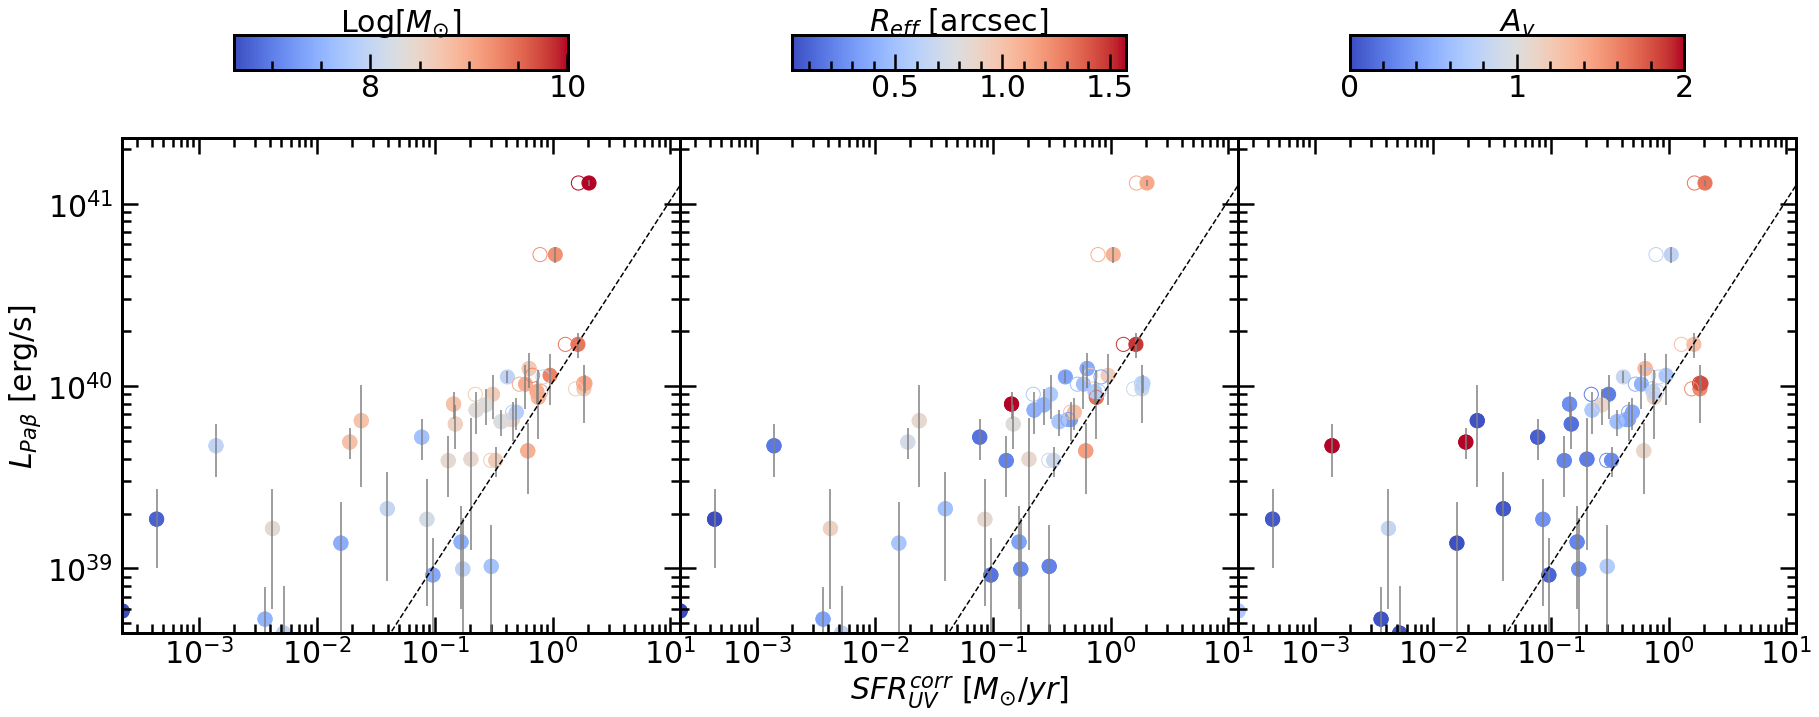

In [76]:
xlpab = np.linspace(36, 42 , num = 1000)
ylpab = np.linspace(-4.02 , 1.98 , num = 1000)

fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='coolwarm')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='coolwarm')
scatterdots.set_facecolor('none') 
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['gf_re_j'], cmap='coolwarm')
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['gf_re_j'], cmap='coolwarm')
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'Log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = '$R_{eff}$ [arcsec]')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

plt.show()

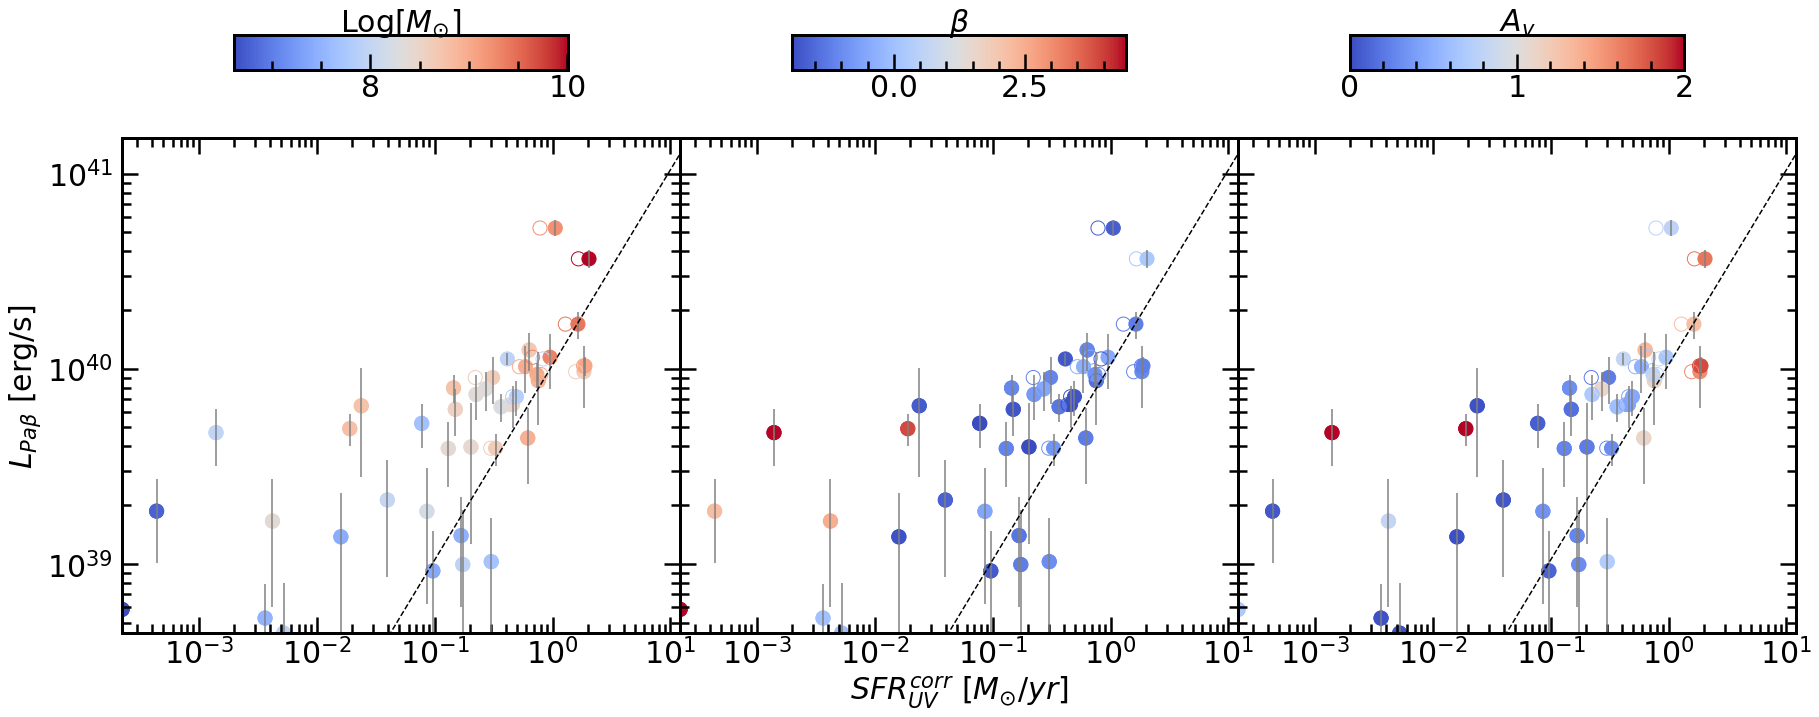

In [20]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='coolwarm')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['td_lmass'], cmap='coolwarm')
scatterdots.set_facecolor('none') 
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_UV_beta'], cmap='coolwarm')
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_UV_beta'], cmap='coolwarm')
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'] , fullmergedf['PAB_L'] , yerr = fullmergedf['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr']) -10**-6 , max(fullmergedf['ir_SFR-UV_corr']) + 10 , min(fullmergedf['PAB_L']) - 10**36, max(fullmergedf['PAB_L'])  + 10**41])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'], fullmergedf['PAB_L'], s=200, c=fullmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'Log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

plt.show()

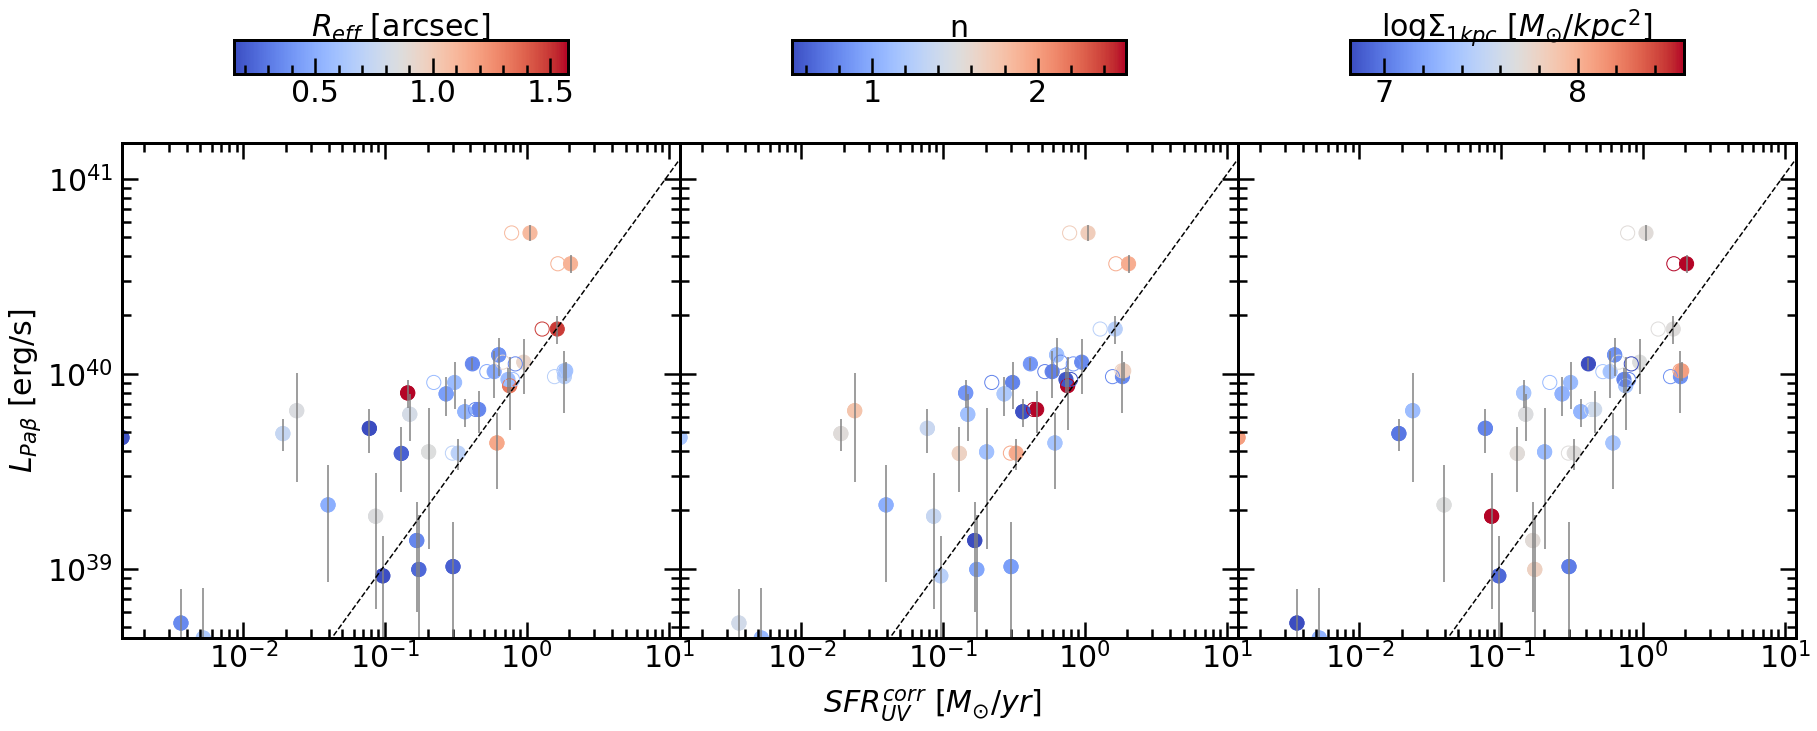

In [22]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
ax0.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax0.axis([min(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) -10**-6 , max(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) + 10 , min(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] ) - 10**36, max(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] )  + 10**41])
scatterdots = ax0.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
scatterdots.set_facecolor('none') 
#ax0.scatter(10**ylpab , 10**xlpab, s = 10 , c = 'black')
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
ax1.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax1.axis([min(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) -10**-6 , max(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) + 10 , min(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] ) - 10**36, max(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] )  + 10**41])
scatterdots1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
scatterdots1.set_facecolor('none') 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
ax2.errorbar(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0]  , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0]  , yerr = fullmergedf['PAB_L_ERR'][fullmergedf['gf_f_j'] == 0]   , linestyle = 'None' , c = 'grey' )
ax2.axis([min(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) -10**-6 , max(fullmergedf['ir_SFR-UV_corr'][fullmergedf['gf_f_j'] == 0] ) + 10 , min(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] ) - 10**36, max(fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] )  + 10**41])
scatterdots2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_L'][fullmergedf['gf_f_j'] == 0] , s=200, c=fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , cmap='coolwarm')
scatterdots2.set_facecolor('none') 
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = '$R_{eff}$ [arcsec]')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'n')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14]) 
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

fig.text(0.5,0.04, r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]", ha="center", va="center")
plt.show()

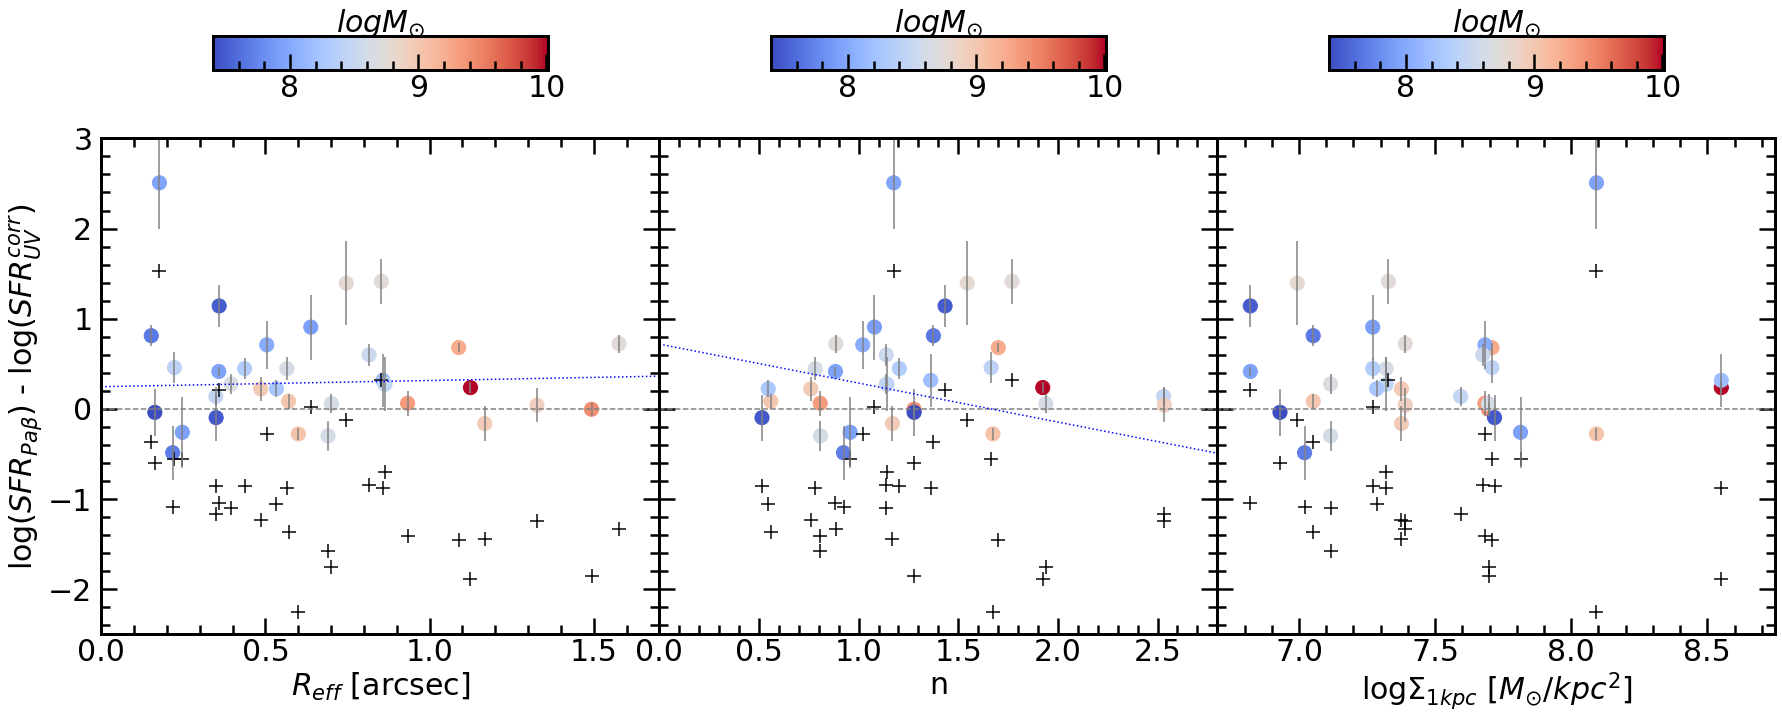

In [34]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"$R_{eff}$ [arcsec]")
y0 = ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
ax0.errorbar(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , yerr = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , c = 'gray',  linestyle = 'None')
ax0.scatter(fullmergedf['gf_re_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 200 , marker = '+' , c = 'black')
ax0.axis([0 , 1.7 , -2.5 , 3])
ax0.plot([0 , 2] , [0 , 0] , '--' , c = 'gray')
ax0.plot([0 , 2] , [0.06881018*0 + 0.244220240 , 0.06881018*2 + 0.24422024] , ':' , c = 'blue')

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1= ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
ax1.errorbar(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , yerr = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , c = 'gray',  linestyle = 'None')
ax1.scatter(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 200 , marker = '+' , c = 'black')
ax1.plot([0 , 8] , [0 , 0] , '--' , c = 'gray')
ax1.plot([0 , 8] , [-0.43273994*0 + 0.71699238 , -0.43273994*8 + 0.71699238] , ':' , c = 'blue')
ax1.set_xlabel(r"n")
ax1.axis([0 , 2.8 , -2.5 , 3])
ax1.tick_params(labelleft = False)

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
y2 = ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , s = 200 , c = fullmergedf['td_lmass'][fullmergedf['gf_f_j'] == 0] , cmap = 'coolwarm')
ax2.errorbar(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , yerr = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , c = 'gray',  linestyle = 'None')
ax2.scatter(fullmergedf['SIGMA_1'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'][fullmergedf['gf_f_j'] == 0] , s = 200 , marker = '+' , c = 'black')
ax2.axis([6.7 , 8.75 , -2.5 , 3])
ax2.plot([0 , 10] , [0 , 0] , '--' , c = 'gray')
#ax2.plot([0 , 10] , [-19.554156*0 + 146.46343555 , -19.554156*10 + 146.46343555] , ':' , c = 'blue')
ax2.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = '$logM_{\odot}$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = '$logM_{\odot}$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$logM_{\odot}$')
ax5.xaxis.set_label_position('top')
plt.show()

In [150]:
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

def f0(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x*0 + B[1]

def fpos(B , x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + 0.29319574 


linear = odr.Model(f)
linear0 = odr.Model(f0)
linearpos = odr.Model(fpos)
linmass = odr.Model(f)

print('One Line')
mydata = odr.RealData(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX2'] , sy = fullmergedf['PAB_SFR_EX2_ERR'])
myodr = odr.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

print('\nTwo Line negative')
betaneg= odr.RealData(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] < 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] < 0] , sy = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] < 0])
betanegodr = odr.ODR(betaneg, linear0 , beta0 = [0. , 0.])
betanegoutput = betanegodr.run()
betanegoutput.pprint()

print('\nTwo Line positive')
betapos= odr.RealData(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] > 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] > 0] , sy = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] > 0])
betaposodr = odr.ODR(betapos, linearpos, beta0=[0])
betaposoutput = betaposodr.run()
betaposoutput.pprint()

print('\nTwo Line positive')
betapos= odr.RealData(fullmergedf['ir_UV_beta'][fullmergedf['ir_UV_beta'] > 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] > 0] , sy = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] > 0])
betaposodr = odr.ODR(betapos, linear, beta0=[0 , 0])
betaposoutput = betaposodr.run()
betaposoutput.pprint()

One Line
Beta: [0.55480718 0.89753805]
Beta Std Error: [0.07515715 0.10906714]
Beta Covariance: [[0.00563789 0.00393725]
 [0.00393725 0.01187309]]
Residual Variance: 1.0018995644342445
Inverse Condition #: 0.5468692399936621
Reason(s) for Halting:
  Sum of squares convergence

Two Line negative
Beta: [0.         0.29319574]
Beta Std Error: [0.        0.0588609]
Beta Covariance: [[0.         0.        ]
 [0.         0.00039389]]
Residual Variance: 8.795971811900113
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Both sum of squares and parameter convergence

Two Line positive
Beta: [0.57712588]
Beta Std Error: [0.10516597]
Beta Covariance: [[0.00870356]]
Residual Variance: 1.2707301544605831
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence

Two Line positive
Beta: [0.4102908  0.79155314]
Beta Std Error: [0.13877421 0.36400013]
Beta Covariance: [[ 0.01498819 -0.03063885]
 [-0.03063885  0.10311806]]
Residual Variance: 1.

In [24]:
print('\nMass fit beta < 0')
mass = odr.RealData(fullmergedf['td_lmass'][fullmergedf['ir_UV_beta'] < 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['ir_UV_beta'] < 0] , sy = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['ir_UV_beta'] < 0])
massodr = odr.ODR(mass, linmass, beta0=[0., 0.])
massoutput = massodr.run()
massoutput.pprint()

print('\nSersic fit')
sersic = odr.RealData(fullmergedf['gf_n_j'][fullmergedf['gf_f_j'] == 0] , fullmergedf['PAB_SFR_EX2'][fullmergedf['gf_f_j'] == 0] , sy = fullmergedf['PAB_SFR_EX2_ERR'][fullmergedf['gf_f_j'] == 0] , sx = fullmergedf['gf_dn_j'][fullmergedf['gf_f_j'] == 0] )
sersicodr = odr.ODR(sersic, linear, beta0=[0., 0.])
sersicoutput = sersicodr.run()
sersicoutput.pprint()


Mass fit beta < 0


NameError: name 'linmass' is not defined

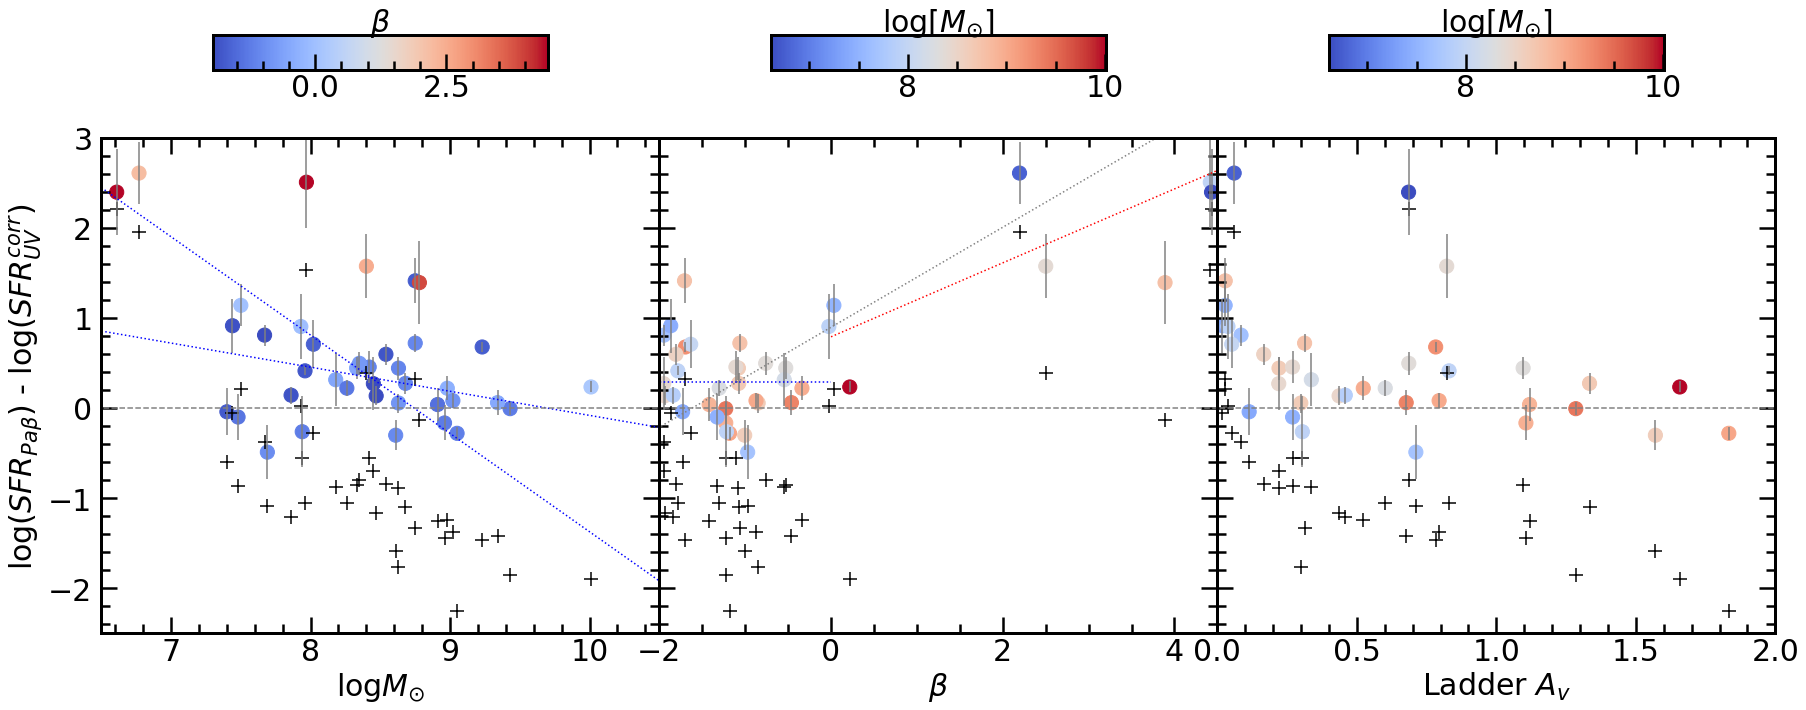

In [10]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
y0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['ir_UV_beta'] , cmap = 'coolwarm')
ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
ax0.errorbar(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax0.plot([6.5 , 10.5] , [-1.09164224*6.5 + 9.54330567 ,-1.09164224*10.5 + 9.54330567] , c = 'blue' ,ls = ':')
ax0.plot([6.5 , 10.5] , [-0.26755265*6.5 +  2.5944637 ,-0.26755265*10.5 +  2.5944637] , c = 'blue' ,ls = ':')

ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"log$M_{\odot}$")
ax0.axis([6.5 , 10.5 , -2.5 , 3])

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'coolwarm')
ax1.scatter(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
ax1.errorbar(fullmergedf['ir_UV_beta'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax1.plot([-2.5 , 4.5] , [0.55480718*(-2.5) + 0.89753805 , 0.55480718*(4.5) + 0.89753805] , c = 'gray' ,ls = ':')
ax1.plot([-2.5 , 0] , [0.29319574, 0.29319574] , c = 'blue' ,ls = ':')
ax1.plot([0 , 4.5] , [0.4102908*0  + 0.79155314, 0.4102908*4.5  + 0.79155314] , c = 'red' ,ls = ':')
ax1.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"$\beta$")
ax1.axis([-2 , 4.5 , -2.5 , 3])
ax1.tick_params(labelleft = False)


ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(fullmergedf['ir_SFR-ladder_total_Av'] , fullmergedf['PAB_SFR_EX2'] , s = 200 , c = fullmergedf['td_lmass'] , cmap = 'coolwarm')
ax2.scatter(fullmergedf['ir_SFR-ladder_total_Av'] , fullmergedf['PAB_SFR_EX_LL_1SIGMA'] , s = 200 , marker = '+' , c = 'black')
ax2.errorbar(fullmergedf['ir_SFR-ladder_total_Av'] , fullmergedf['PAB_SFR_EX2'] , yerr = fullmergedf['PAB_SFR_EX2_ERR'] , ls = 'None' , c = 'gray')
ax2.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax2.set_xlabel(r"Ladder $A_v$")
ax2.axis([0 , 2 , -2.5 , 3])
ax2.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'log$[M_{\odot}]$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r'log$[M_{\odot}]$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

plt.show()

In [7]:
x = np.genfromtxt('D:/tkrs_gdnmatched.dat', dtype = None)
hadf = pd.DataFrame(x)
hadf = hadf.rename(columns = {'f0':'3DHST_ID','f1':'offset' , 'f2':'Ben_ID' , 'f3':'z' , 'f4':'rmag' , 'f5':'hkmag' , 'f6':'sigkms' , 'f7':'esigkms' , 'f8':'loglum3727' , 'f9':'eloglum3727' , 'f10':'loglum4340' , 'f11':'eloglum4340','f12':'loglum4861' , 'f13':'eloglum4861' , 'f14':'loglum5007' , 'f15':'eloglum5007' , 'f16':'loglum6563' , 'f17':'eloglum6563' , 'f18':'loglum6583' , 'f19':'eloglum6583'})
hamergedf = pd.merge(idmergedf, hadf , how = 'inner' , left_on = 'ID' , right_on = '3DHST_ID')
#hamergedf.drop(4, axis=0, inplace=True)
hamergedf.drop(12, axis=0, inplace=True)
# hamergedf.drop(10, axis=0, inplace=True)
hamergedf['HA_L'] = 10**hamergedf['loglum6563']
hamergedf['HA_L_ERR'] = (1/.434)*10**hamergedf['loglum6563'] * hamergedf['eloglum6563']
hamergedf['HB_L'] = 10**hamergedf['loglum4861']
hamergedf['HB_L_ERR'] = (1/.434)*10**hamergedf['loglum4861'] * hamergedf['eloglum4861']
hamergedf['HA_FLUX'] = 10**hamergedf['loglum6563']/(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
hamergedf['HA_FLUX_ERR'] = hamergedf['HA_FLUX']*np.sqrt((hamergedf['HA_L_ERR']/hamergedf['HA_L'])**2)
hamergedf['HB_FLUX'] = 10**hamergedf['loglum4861']/(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
hamergedf['HB_FLUX_ERR'] = hamergedf['HB_FLUX']*np.sqrt((hamergedf['HB_L_ERR']/hamergedf['HB_L'])**2)
hamergedf['PAB_FLUX'] = hamergedf['PAB_FLUX']*10**(-17)
hamergedf['PAB_FLUX_ERR'] = hamergedf['PAB_FLUX_ERR']*10**(-17)
hamergedf['PAB_L'] = hamergedf['PAB_FLUX'] * 4 * np.pi * hamergedf['DL']**2 * 9.521 * 10**(48)
hamergedf['HA_SFR'] = hamergedf['loglum6563'] - 41.27
hamergedf['PAB_SFR'] = np.log10(hamergedf['PAB_L'].astype(float)) - 40.02
hamergedf['PABHA_EXCESS'] = hamergedf['PAB_SFR'] - hamergedf['HA_SFR']
#display(hamergedf)


In [30]:
x = np.genfromtxt('pabhahb_dc_balmer.dat', dtype = None)
balmerdf = pd.DataFrame(x)
balmerdf = balmerdf.rename(columns = {'f0':'FIELD' , 'f1':'ID' , 'f2':'PAB_FLUX_DC_BALMER' , 'f3':'PAB_FLUX_DC_BALMER_ERR' , 'f4':'HA_FLUX_DC_BALMER' , 'f5':'HA_FLUX_DC_BALMER_ERR' , 'f6':'HB_FLUX_DC_BALMER' , 'f7':'HB_FLUX_DC_BALMER_ERR'})
#display(balmerdf)

x = np.genfromtxt('pabhahb_dc_pabha.dat', dtype = None)
pabhadcdf = pd.DataFrame(x)
pabhadcdf = pabhadcdf.rename(columns = {'f0':'FIELD' , 'f1':'ID' , 'f2':'PAB_FLUX_DC_PABHA' , 'f3':'HA_FLUX_DC_PABHA' , 'f4':'HB_FLUX_DC_PABHA'})
#display(pabhadcdf)

C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.
C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [44]:
dcmergedf = pd.merge(hamergedf, balmerdf , how = 'inner' , left_on = 'ID' , right_on = 'ID')
dcmergedf = pd.merge(dcmergedf, pabhadcdf , how = 'inner' , left_on = 'ID' , right_on = 'ID')
#dcmergedf.loc[4 , 'PAB_FLUX_DC_BALMER'] = 8.37e-16
dcmergedf['HA_L_DC_BALMER'] = dcmergedf['HA_FLUX_DC_BALMER']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['HA_L_DC_BALMER_ERR'] = dcmergedf['HA_FLUX_DC_BALMER_ERR']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['HA_L_DC_PABHA'] = dcmergedf['HA_FLUX_DC_PABHA']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['PAB_L_DC_BALMER'] = dcmergedf['PAB_FLUX_DC_BALMER']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['PAB_L_DC_BALMER_ERR'] = dcmergedf['PAB_FLUX_DC_BALMER_ERR']* 4 * np.pi * dcmergedf['DL']**2 * 9.521 * 10**(48)
# dcmergedf['PAB_FLUX_DC_BALMER'].iloc[10] = dcmergedf['PAB_FLUX'].iloc[10]
# dcmergedf['HA_FLUX_DC_BALMER'].iloc[10] = dcmergedf['HA_FLUX'].iloc[10]
# dcmergedf['HB_FLUX_DC_BALMER'].iloc[10] = dcmergedf['HB_FLUX'].iloc[10]
dcmergedf['HA_SFR_DC_BALMER'] = np.log10(dcmergedf['HA_L_DC_BALMER'].astype(float)) - 41.27
dcmergedf['HA_SFR_DC_BALMER_ERR'] = .434*dcmergedf['HA_L_DC_BALMER_ERR']/dcmergedf['HA_L_DC_BALMER']
dcmergedf['PAB_SFR_DC_BALMER'] = np.log10(dcmergedf['PAB_L_DC_BALMER'].astype(float)) - 40.02
dcmergedf['PAB_SFR_DC_BALMER_ERR'] = .434*dcmergedf['PAB_L_DC_BALMER_ERR']/dcmergedf['PAB_L_DC_BALMER']
dcmergedf['PABHA_EXCESS_DC_BALMER'] = dcmergedf['PAB_SFR_DC_BALMER'] - dcmergedf['HA_SFR_DC_BALMER']
dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'] = np.sqrt(dcmergedf['PAB_SFR_DC_BALMER_ERR'].astype(None)**2 + dcmergedf['HA_SFR_DC_BALMER_ERR'].astype(None)**2)
dcmergedf['BALMER_ERR'] = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] *np.sqrt((dcmergedf['HA_FLUX_ERR'].astype(None)/dcmergedf['HA_FLUX'].astype(None))**2 + (dcmergedf['HB_FLUX_ERR'].astype(None)/dcmergedf['HB_FLUX'].astype(None))**2)
dcmergedf['PABHA_ERR'] = dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'] *np.sqrt((dcmergedf['PAB_FLUX_ERR'].astype(None)/dcmergedf['PAB_FLUX'].astype(None))**2 + (dcmergedf['HA_FLUX_ERR'].astype(None)/dcmergedf['HA_FLUX'].astype(None))**2)
display(dcmergedf)

,FIELD_x,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,PAB_L_DC_BALMER,PAB_L_DC_BALMER_ERR,HA_SFR_DC_BALMER,HA_SFR_DC_BALMER_ERR,PAB_SFR_DC_BALMER,PAB_SFR_DC_BALMER_ERR,PABHA_EXCESS_DC_BALMER,PABHA_EXCESS_DC_BALMER_ERR,BALMER_ERR,PABHA_ERR
0,GN1,37683,189.306089,62.360350,0.277481,0.001144,3.907847e-17,1.367054e-17,16377.307364,37683,...,1.34457e+40,4.77026e+39,0.035738,0.0689731,0.108584,0.153974,0.072846,0.168717,0.237763,0.0398432
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,1.944551e-16,2.126779e-17,14610.064284,19221,...,1.6924e+40,1.89996e+39,0.318804,0.0289929,0.208503,0.0487226,-0.110300,0.056696,0.118504,0.0105936
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,1.452055e-16,2.317139e-17,15374.278308,15610,...,1.91319e+40,3.24309e+39,-0.399629,0.0647588,0.261758,0.0735683,0.661387,0.098010,0.182237,0.0509054
3,GN2,18157,189.182293,62.232458,0.196814,0.027064,3.889960e-17,1.627647e-17,15343.154062,18157,...,1.11574e+40,5.77734e+39,0.125454,0.348785,0.027563,0.224726,-0.097891,0.414913,2.21618,0.0860858
4,GN3,34456,189.339813,62.324291,0.211290,0.010113,2.750763e-16,2.862229e-17,15695.781592,34456,...,2.14414e+41,1.01932e+41,0.629005,1.03795,1.311253,0.206322,0.682248,1.058256,7.94836,0.19947
5,GN3,34157,189.206826,62.321196,0.245119,0.014142,2.828275e-16,2.688524e-17,15962.430241,34157,...,6.01477e+40,1.20816e+40,-0.283192,0.12383,0.759219,0.087176,1.042411,0.151438,0.492984,0.136513
6,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808e-17,1.187729e-17,16107.064381,33511,...,1.13184e+40,4.68201e+39,-0.728277,0.292428,0.033785,0.17953,0.762062,0.343140,1.0228,0.154941
7,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371e-17,9.957366e-18,15748.400334,34368,...,1.39223e+40,2.88724e+39,0.123587,0.139242,0.123710,0.0900043,0.000123,0.165798,0.572523,0.0303461
8,GN3,35455,189.332074,62.328669,0.205959,0.153672,8.165377e-18,5.576698e-18,15460.389849,35455,...,1.983e+39,1.0919e+39,-0.208651,0.166187,-0.722678,0.238975,-0.514027,0.291080,0.630487,0.0232969
9,GN4,24611,189.359058,62.264140,0.262365,0.015258,3.994653e-17,1.638382e-17,16183.517689,24611,...,1.24017e+40,1.25211e+40,-0.238869,0.475116,0.073482,0.438178,0.312351,0.646324,2.94213,0.214264


In [24]:
dcmergedf[['FIELD' , 'ID' , 'Z_50' , 'z' ,'gf_f_j' , 'PAB_L' , 'ir_UV_beta' , 'PABHA_EXCESS' , 'PABHA_EXCESS_DC_BALMER' ]]

,FIELD,ID,Z_50,z,gf_f_j,PAB_L,ir_UV_beta,PABHA_EXCESS,PABHA_EXCESS_DC_BALMER
0,b'GN1',37683,0.277481,0.2755,0,9.65878e+39,-1.0059,0.304922,0.072846
1,b'GN2',19221,0.139631,0.1389,0,1.03489e+40,-1.1823,0.234895,-0.110300
2,b'GN2',15610,0.199242,0.2008,0,1.69394e+40,-1.2266,0.748897,0.661387
3,b'GN2',18157,0.196814,0.2013,0,4.41525e+39,-1.2265,0.554955,-0.097891
4,b'GN3',34456,0.224320,0.2113,0,1.30064e+41,0.2181,2.014157,1.233610
5,b'GN3',34157,0.245119,0.2755,0,5.26506e+40,-1.6969,1.371403,1.042411
6,b'GN3',33511,0.256401,0.2535,0,9.01711e+39,-1.0790,0.995067,0.762062
7,b'GN3',34368,0.228424,0.2311,0,6.55558e+39,-1.9400,0.346611,0.000123
8,b'GN3',35455,0.205959,0.2468,0,1.02599e+39,-0.9712,-0.218859,-0.514027
9,b'GN4',24611,0.262365,0.2662,0,8.68359e+39,-1.4197,0.948700,0.312351


In [45]:
dcmergedf.to_csv('dcmergePAB.csv',index=False)

In [ ]:
display

In [7]:
#print(hamergedf.to_latex(index = False , columns = ['FIELD', 'ID' , 'Z_50' , 'HA_FLUX' , 'HA_FLUX_ERR',  'HB_FLUX' , 'HB_FLUX_ERR'] ,  longtable = True))

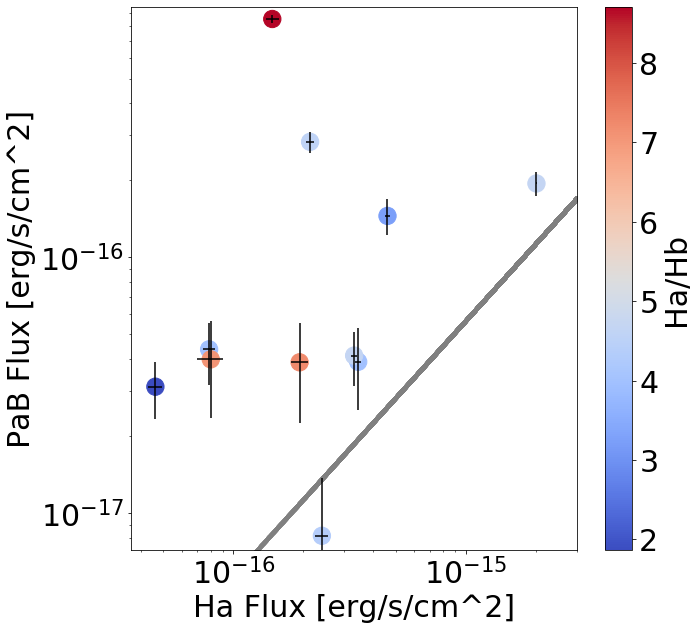

In [21]:
xha = np.linspace(min(hamergedf['HA_FLUX']) - 10**-16 , max(hamergedf['HA_FLUX'] + 10**-15) , num=10000)
yha = xha/17.6
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size':30})
plt.scatter(hamergedf['HA_FLUX'] , hamergedf['PAB_FLUX']  , s = 300 , c = hamergedf['HA_FLUX']/hamergedf['HB_FLUX'] , cmap= 'coolwarm')
cb = plt.colorbar()
cb.set_label('Ha/Hb')
plt.scatter(xha , yha , s = 10 ,  c = 'grey')
#plt.title('PaB Flux vs Ha Flux')
plt.ylabel("PaB Flux [erg/s/cm^2]")
plt.xlabel("Ha Flux [erg/s/cm^2]")
plt.errorbar(hamergedf['HA_FLUX'] , hamergedf['PAB_FLUX'] , xerr = hamergedf['HA_FLUX_ERR'] , yerr = hamergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
plt.axis([min(hamergedf['HA_FLUX'])-10**-17  , max(hamergedf['HA_FLUX'])+ 10**-15 , min(hamergedf['PAB_FLUX']) - 10**-18 , max(hamergedf['PAB_FLUX']) + 10**-16])
#plt.legend()
#plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
#print(hamergedf.to_latex(index = False , columns = ['FIELD', 'ID' , 'Z_50' , 'HA_FLUX' , 'HA_FLUX_ERR',  'HB_FLUX' , 'HB_FLUX_ERR'] ,  longtable = True))

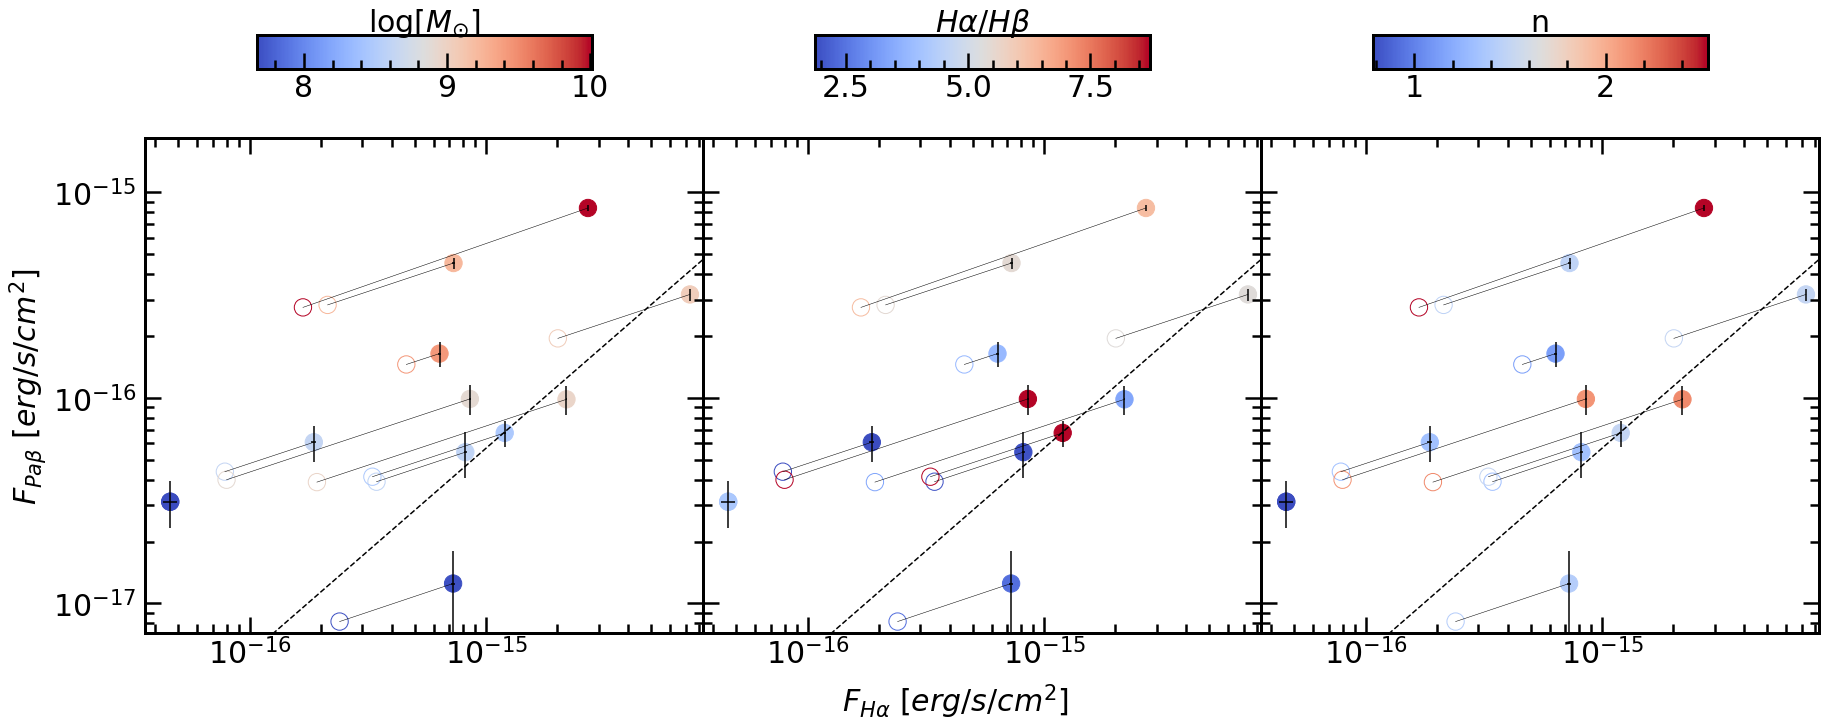

In [61]:
xha = np.linspace(10**-17 , 10**-14 , num = 10000)
yha = xha/17.6

fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$F_{Pa\beta}$ [$erg/s/cm^2$]")
y0 = ax0.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap= 'coolwarm')
scatterdots0 = ax0.scatter(dcmergedf['HA_FLUX'] , dcmergedf['PAB_FLUX'] , s=300, c=dcmergedf['td_lmass'] , cmap='coolwarm')
scatterdots0.set_facecolor('none') 
ax0.errorbar(dcmergedf['HA_FLUX_DC_BALMER']  , dcmergedf['PAB_FLUX_DC_BALMER']  , xerr = dcmergedf['HA_FLUX_ERR']  , yerr = dcmergedf['PAB_FLUX_ERR']  ,c = 'black' , linestyle = 'None')
ax0.plot(xha , yha , '--' ,  c = 'black')
ax0.axis([min(dcmergedf['HA_FLUX'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax0.set_yscale('log')
ax0.set_xscale('log')
for i in range(len(dcmergedf)):
    ax0.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
 
ax1 = fig.add_subplot(gs[2:12, 10:15])                                                                                      
y1 = ax1.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap= 'coolwarm')
scatterdots1 = ax1.scatter(dcmergedf['HA_FLUX'], dcmergedf['PAB_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
scatterdots1.set_facecolor('none')
ax1.errorbar(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER'] , xerr = dcmergedf['HA_FLUX_ERR'] , yerr = dcmergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
ax1.plot(xha , yha , '--' ,  c = 'black')
ax1.axis([min(dcmergedf['HA_FLUX'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax1.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
                                                                                            
ax2 = fig.add_subplot(gs[2:12, 5:10])
y2 = ax2.scatter(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER']  , s = 300 , c = dcmergedf['gf_n_j'] , cmap= 'coolwarm')
scatterdots2 = ax2.scatter(dcmergedf['HA_FLUX'], dcmergedf['PAB_FLUX'], s=300, c=dcmergedf['gf_n_j'], cmap='coolwarm')
scatterdots2.set_facecolor('none') 
ax2.errorbar(dcmergedf['HA_FLUX_DC_BALMER'] , dcmergedf['PAB_FLUX_DC_BALMER'] , xerr = dcmergedf['HA_FLUX_ERR'] , yerr = dcmergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
ax2.plot(xha , yha , '--' ,  c = 'black')
ax2.axis([min(dcmergedf['HA_FLUX'])-10**-17  , max(dcmergedf['HA_FLUX_DC_BALMER'])+ 10**-15 , min(dcmergedf['PAB_FLUX']) - 10**-18 , max(dcmergedf['PAB_FLUX_DC_BALMER']) + 10**-15])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax2.plot([dcmergedf['HA_FLUX'].iloc[i] , dcmergedf['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedf['PAB_FLUX'].iloc[i] , dcmergedf['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
    

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r'n')
ax5.xaxis.set_label_position('top')

fig.text(0.5,0.04, r"$F_{H\alpha}$ [$erg/s/cm^2$]", ha="center", va="center")
plt.show()

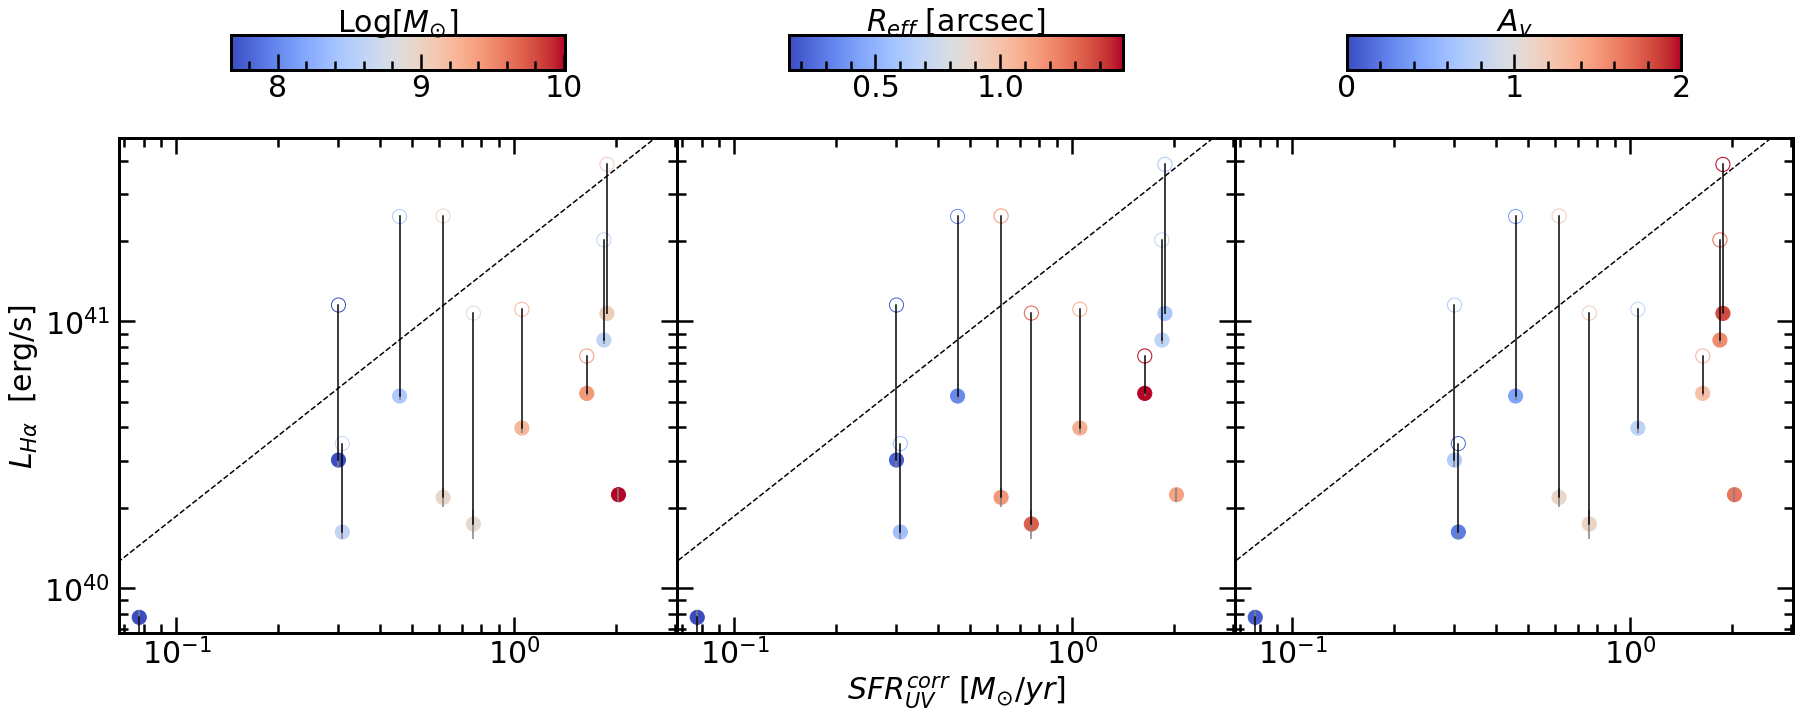

In [56]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{H\alpha}$  [erg/s]")
y0 = ax0.scatter(dcmergedf['ir_SFR-UV_corr'], dcmergedf['HA_L'], s=200, c=dcmergedf['td_lmass'], cmap='coolwarm')
ax0.errorbar(dcmergedf['ir_SFR-UV_corr'] , dcmergedf['HA_L'] , yerr = dcmergedf['HA_L_ERR']  , linestyle = 'None' , c = 'grey' )
scatterbalmer = ax0.scatter(dcmergedf['ir_SFR-UV_corr'], dcmergedf['HA_L_DC_BALMER'], s=200, c=dcmergedf['td_lmass'], cmap='coolwarm')
scatterbalmer.set_facecolor('none') 
ax0.axis([min(dcmergedf['ir_SFR-UV_corr']) -10**-2 , max(dcmergedf['ir_SFR-UV_corr']) + 1 , min(dcmergedf['HA_L']) - 10**39, max(dcmergedf['HA_L_DC_BALMER'])  + 10**41])
ax0.plot([10**-4.27 , 10**1.23] , [10**37 , 10**42.5] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')
for i in range(len(dcmergedf)):
    ax0.plot([dcmergedf['ir_SFR-UV_corr'].iloc[i] , dcmergedf['ir_SFR-UV_corr'].iloc[i]] , [dcmergedf['HA_L'].iloc[i] , dcmergedf['HA_L_DC_BALMER'].iloc[i]] , c = 'black')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(dcmergedf['ir_SFR-UV_corr'], dcmergedf['HA_L'], s=200, c=dcmergedf['gf_re_j'], cmap='coolwarm')
ax1.errorbar(dcmergedf['ir_SFR-UV_corr'] , dcmergedf['HA_L'] , yerr = dcmergedf['HA_L_ERR']  , linestyle = 'None' , c = 'grey' )
scatterbalmer = ax1.scatter(dcmergedf['ir_SFR-UV_corr'], dcmergedf['HA_L_DC_BALMER'], s=200, c=dcmergedf['gf_re_j'], cmap='coolwarm')
scatterbalmer.set_facecolor('none') 
ax1.axis([min(dcmergedf['ir_SFR-UV_corr']) -10**-2 , max(dcmergedf['ir_SFR-UV_corr']) + 1 , min(dcmergedf['HA_L']) - 10**39, max(dcmergedf['HA_L_DC_BALMER'])  + 10**41])
ax1.plot([10**-4.27 , 10**1.23] , [10**37 , 10**42.5] , '--' , c = 'black')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax1.plot([dcmergedf['ir_SFR-UV_corr'].iloc[i] , dcmergedf['ir_SFR-UV_corr'].iloc[i]] , [dcmergedf['HA_L'].iloc[i] , dcmergedf['HA_L_DC_BALMER'].iloc[i]] , c = 'black')



ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(dcmergedf['ir_SFR-UV_corr'], dcmergedf['HA_L'], s=200, c=dcmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
ax2.errorbar(dcmergedf['ir_SFR-UV_corr'] , dcmergedf['HA_L'] , yerr = dcmergedf['HA_L_ERR']  , linestyle = 'None' , c = 'grey' )
scatterbalmer = ax2.scatter(dcmergedf['ir_SFR-UV_corr'], dcmergedf['HA_L_DC_BALMER'], s=200, c=dcmergedf['ir_SFR-ladder_total_Av'], cmap='coolwarm')
scatterbalmer.set_facecolor('none') 
ax2.axis([min(dcmergedf['ir_SFR-UV_corr']) -10**-2 , max(dcmergedf['ir_SFR-UV_corr']) + 1 , min(dcmergedf['HA_L']) - 10**39, max(dcmergedf['HA_L_DC_BALMER'])  + 10**41])
ax2.plot([10**-4.27 , 10**1.23] , [10**37 , 10**42.5] , '--' , c = 'black')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(labelleft = False)
for i in range(len(dcmergedf)):
    ax2.plot([dcmergedf['ir_SFR-UV_corr'].iloc[i] , dcmergedf['ir_SFR-UV_corr'].iloc[i]] , [dcmergedf['HA_L'].iloc[i] , dcmergedf['HA_L_DC_BALMER'].iloc[i]] , c = 'black')


ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'Log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = '$R_{eff}$ [arcsec]')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
ax5.xaxis.set_label_position('top')

plt.show()

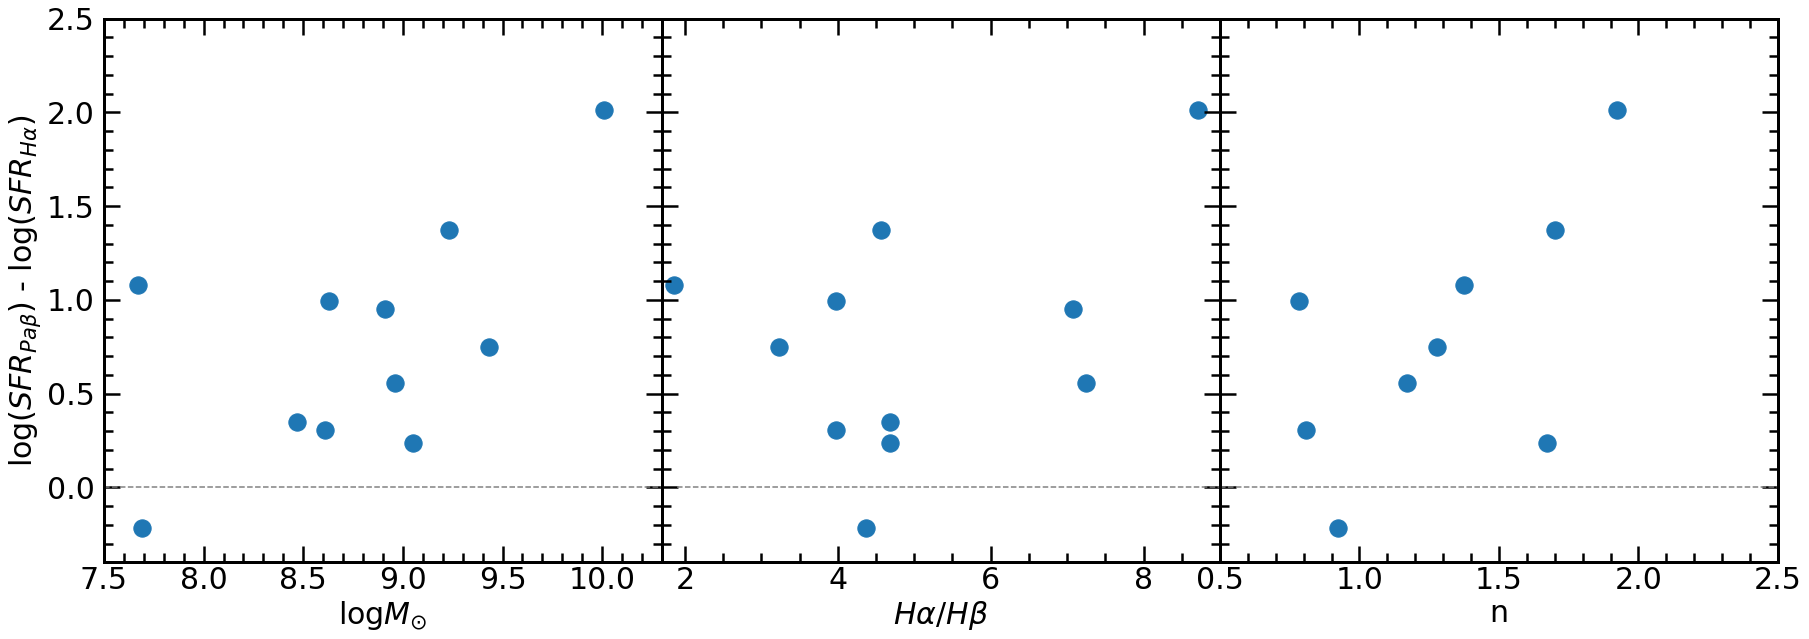

In [174]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize = (30 , 10) , gridspec_kw={'hspace': 0, 'wspace': 0})

axs[0].set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{H\alpha}$)')

axs[0].scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS']  , s = 300)
#axs[0].errorbar(hamergedf['HA_FLUX'] , hamergedf['PAB_FLUX'] , xerr = hamergedf['HA_FLUX_ERR'] , yerr = hamergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
axs[0].plot([7.5 , 10.5] , [0 , 0] , '--' , c = 'gray')
axs[0].set_xlabel(r"log$M_{\odot}$")
axs[0].axis([7.5 , 10.3 , -.4 , 2.5])

axs[1].scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , dcmergedf['PABHA_EXCESS'], s = 300)
#axs[2].errorbar(hamergedf['HA_FLUX'] , hamergedf['PAB_FLUX'] , xerr = hamergedf['HA_FLUX_ERR'] , yerr = hamergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
axs[1].plot([1.9 , 9] , [0 , 0] , '--' , c = 'gray')
axs[1].set_xlabel(r"$H\alpha/H\beta$")
axs[1].axis([1.7 , 9 , -.4 , 2.5])

axs[2].scatter(dcmergedf['gf_n_j'] , dcmergedf['PABHA_EXCESS']  , s = 300)
#axs[1].errorbar(hamergedf['HA_FLUX'] , hamergedf['PAB_FLUX'] , xerr = hamergedf['HA_FLUX_ERR'] , yerr = hamergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
axs[2].plot([.5 , 2.5] , [0 , 0] , '--' , c = 'gray')
axs[2].set_xlabel(r"n")
axs[2].axis([.5 , 2.5 , -.4 , 2.5])

plt.show()

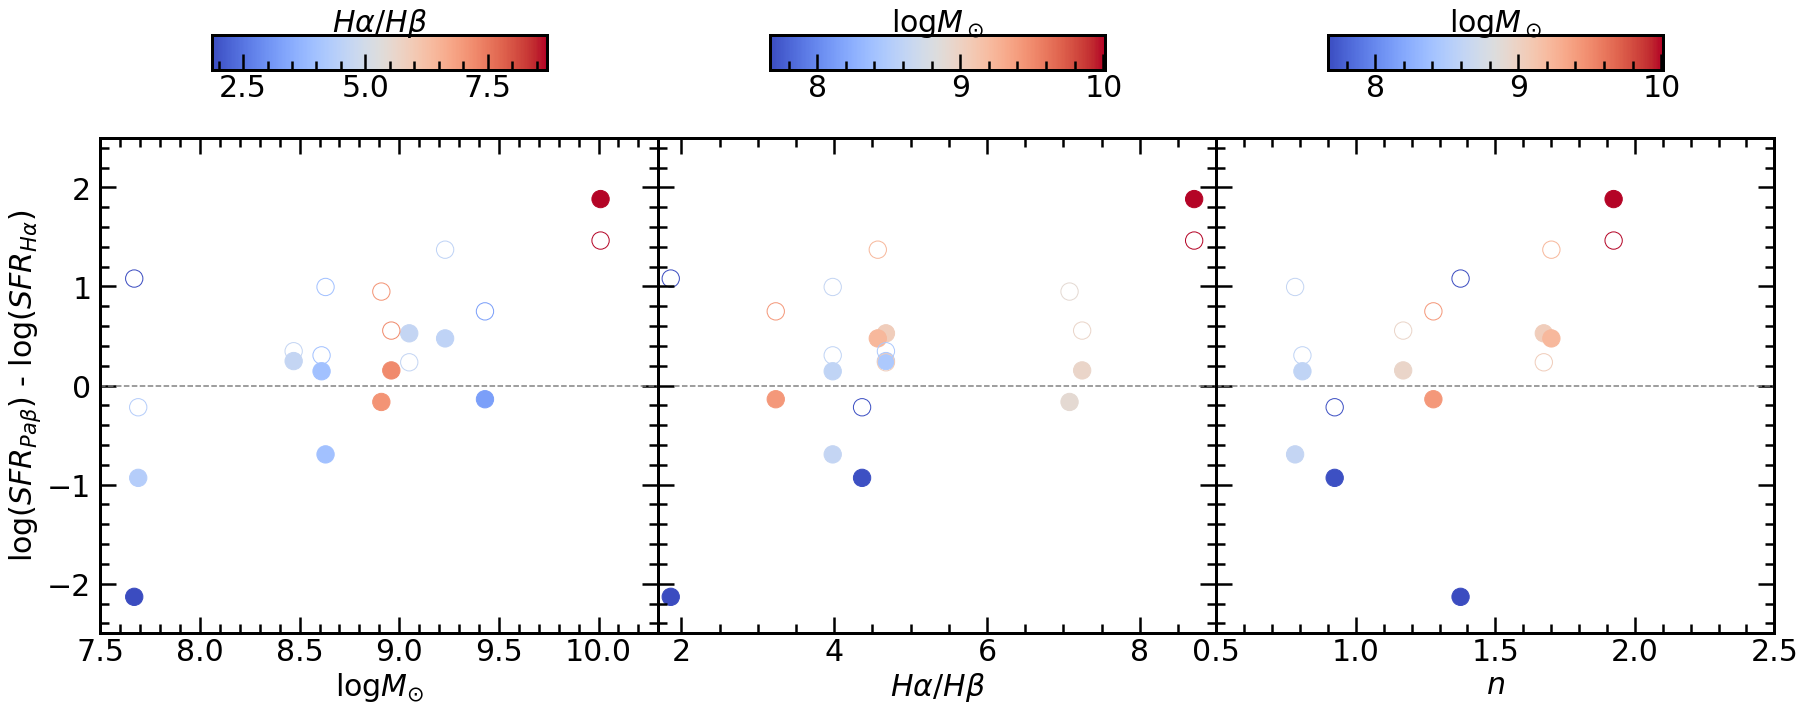

In [66]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_xlabel(r"log$M_{\odot}$")
y0 = ax0.scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
#ax0.errorbar(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
scatterdots0 = ax0.scatter(dcmergedf['td_lmass'] , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
scatterdots0.set_facecolor('none')
ax0.plot([7.5 , 10.5] , [0 , 0] , '--' , c = 'gray')
ax0.axis([7.5 , 10.3 , -2.5 , 2.5])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{H\alpha}$)')
# for i in range(len(dcmergedf)):
#     ax0.plot([dcmergedf['td_lmass'].iloc[i] , dcmergedf['td_lmass'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
 
ax1 = fig.add_subplot(gs[2:12, 5:10])  
ax1.set_xlabel(r"$H\alpha/H\beta$")
y1 = ax1.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX']  , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots1 = ax1.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots1.set_facecolor('none')
#axs[0].errorbar(hamergedf['HA_FLUX'] , hamergedf['PAB_FLUX'] , xerr = hamergedf['HA_FLUX_ERR'] , yerr = hamergedf['PAB_FLUX_ERR'] ,c = 'black' , linestyle = 'None')
ax1.plot([1.9 , 9] , [0 , 0] , '--' , c = 'gray')
ax1.axis([1.7 , 9 , -2.5 , 2.5])
ax1.tick_params(labelleft = False)
# for i in range(len(dcmergedf)):
#     ax1.plot([dcmergedf['HA_FLUX'].iloc[i]/dcmergedf['HB_FLUX'].iloc[i] , dcmergedf['HA_FLUX'].iloc[i]/dcmergedf['HB_FLUX'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
       
ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"$n$")
y2 = ax2.scatter(dcmergedf['gf_n_j']  , dcmergedf['PABHA_EXCESS_DC_BALMER']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots2 = ax2.scatter(dcmergedf['gf_n_j']  , dcmergedf['PABHA_EXCESS']  , s = 300 , c = dcmergedf['td_lmass'] , cmap = 'coolwarm')
scatterdots2.set_facecolor('none')
ax2.plot([.5 , 2.5] , [0 , 0] , '--' , c = 'gray')
ax2.axis([.5 , 2.5 , -2.5 , 2.5])
ax2.tick_params(labelleft = False)
# for i in range(len(dcmergedf)):
#     ax2.plot([dcmergedf['gf_n_j'].iloc[i] ,dcmergedf['gf_n_j'].iloc[i]] , [dcmergedf['PABHA_EXCESS'].iloc[i] , dcmergedf['PABHA_EXCESS_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
            
                                                                                    
ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_\odot$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_\odot$')
ax5.xaxis.set_label_position('top')

#fig.text(0.5,0.04, r"$F_{H\alpha}$ [$erg/s/cm^2$]", ha="center", va="center")
plt.show()

In [68]:
dcmergedf[['ID' , 'PAB_FLUX', 'PAB_FLUX_ERR' ,'HA_FLUX' , 'HA_FLUX_ERR', "HB_FLUX" , "HB_FLUX_ERR"]].to_csv('pabhahbnoncorrected.csv')


In [57]:
(2.6*10**-15)/(8.5415665*10**-16)

3.0439381347672003

In [65]:
2.750763*10**-16*(3.0439)

8.3730474957e-16

In [18]:
dust = np.genfromtxt('dustratios.dat', dtype = None)
dustdf = pd.DataFrame(dust, columns = ['AV' , 'HAHB' , 'PABHA'])
dustdf.to_csv('dustdfPAB.csv' , index = False)
attdf = pd.merge(hamergedf, GNtabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
attdf.to_csv('attdfPAB.csv' , index = False)

In [11]:
#display(attdf)

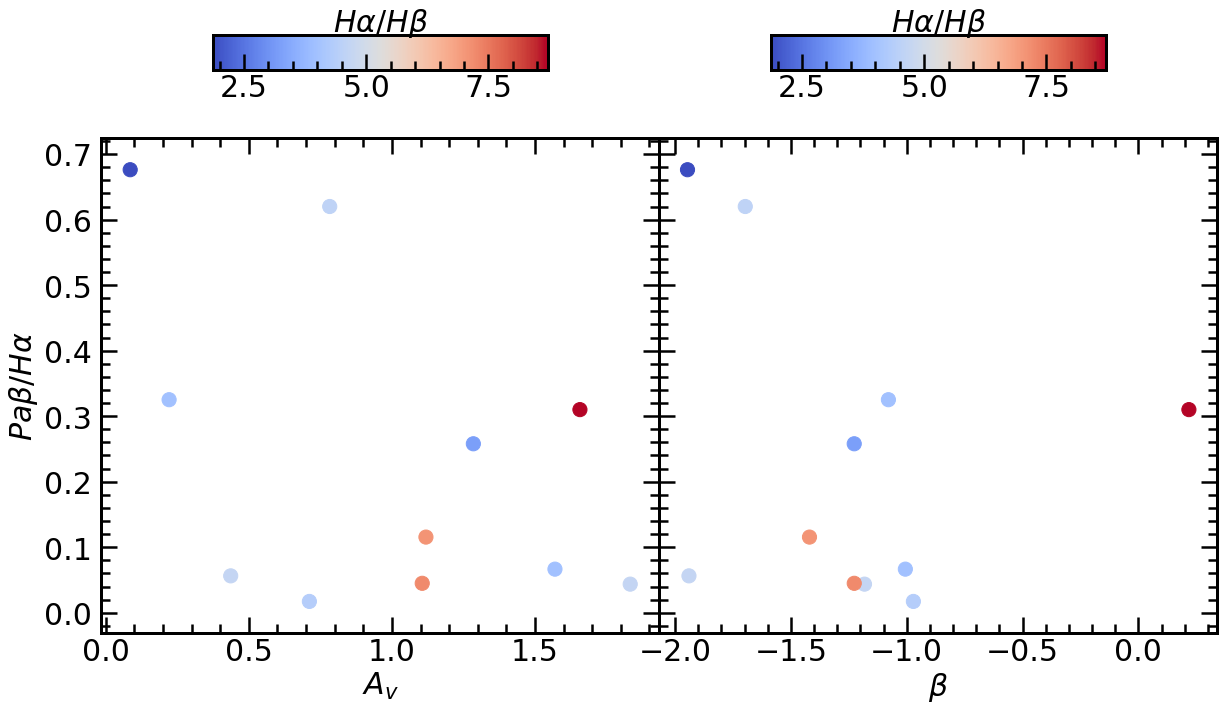

In [69]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['ir_SFR-ladder_total_Av'], dcmergedf['PAB_FLUX_DC_BALMER']/dcmergedf['HA_FLUX_DC_BALMER'], s=200, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
# ax0.set_xscale('log')
#ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$\beta$")
y1 = ax1.scatter(dcmergedf['ir_UV_beta'], dcmergedf['PAB_FLUX_DC_BALMER']/dcmergedf['HA_FLUX_DC_BALMER'], s=200, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
#ax1.set_xscale('log')
#ax1.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')

plt.show()

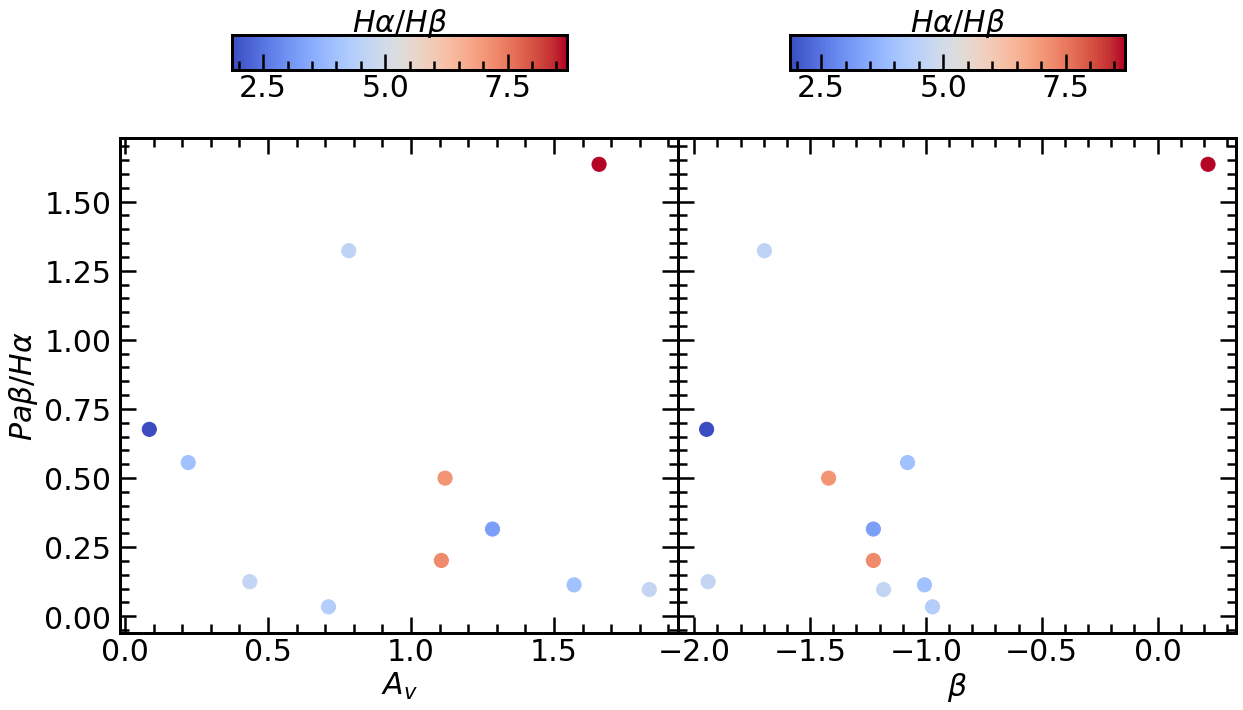

In [71]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['ir_SFR-ladder_total_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=200, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
# ax0.set_xscale('log')
#ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$\beta$")
y1 = ax1.scatter(dcmergedf['ir_UV_beta'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=200, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
#ax1.set_xscale('log')
#ax1.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')

plt.show()

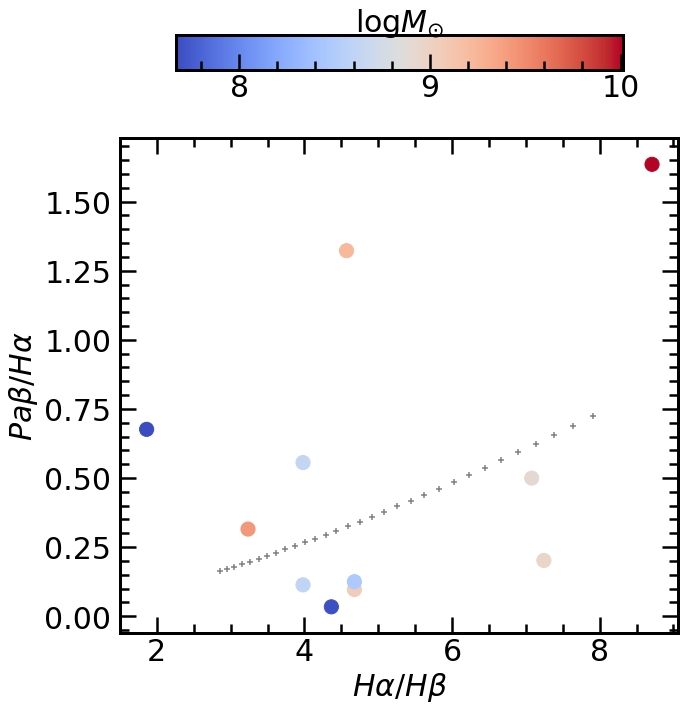

In [19]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$H\alpha/H\beta$")
y0 = ax0.scatter(dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=200, c = dcmergedf['td_lmass'], cmap='coolwarm')
ax0.scatter(dustdf['HAHB'] , dustdf['PABHA'] , s = 30, c = 'gray' , marker = '+')
#ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
# ax0.set_xscale('log')
#ax0.set_yscale('log')

# ax1 = fig.add_subplot(gs[2:12, 5:10])
# ax1.set_xlabel(r"$\beta$")
# y1 = ax1.scatter(dcmergedf['ir_UV_beta'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=200, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
# #ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
# ax1.tick_params(labelleft = False)
# #ax1.set_xscale('log')
# #ax1.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')
# ax4 = fig.add_subplot(gs[0:1,6:9])
# fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
# ax4.xaxis.set_label_position('top')


In [13]:
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(attdf['td_Av'] , attdf['PAB_FLUX']/attdf['HA_FLUX'] , s = 1000 , c = 'black' ,  marker = '*')
plt.scatter(attdf['td_Av'] , attdf['PAB_FLUX']/attdf['HA_FLUX'] ,  s = 700 , c = attdf['PAB_FLUX']/attdf['HA_FLUX'], cmap = 'coolwarm',marker = '*')
plt.scatter(dustdf['AV'] , dustdf['PABHA'] , s = 30, c = 'gray' , marker = '+')
plt.scatter(dustdf['AV'] , 3 * dustdf['PABHA'] , s = 30, c = 'gray' , marker = '+')
plt.ylabel("PaB/Ha")
plt.xlabel("Continuum Av")
plt.show()

KeyError: 'td_Av'

<Figure size 720x720 with 0 Axes>

In [19]:
hdul = fits.open('grizli_v2.1.fits')
zcrit = .3
data_dict= dict()
for obj in hdul[1].data:
    for key in ['FIELD' , 'ID' , 'RA', 'DEC' ,  'Z_50']:
        data_dict.setdefault(key, list()).append(obj[key])
cleardf = pd.DataFrame(data_dict)

cleardf = cleardf[cleardf.Z_50 >= 0]
cleardf = cleardf[cleardf.Z_50 <= zcrit]

clearGNdf = cleardf[cleardf['FIELD'] == 'GN1']
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN2'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN3'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN4'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN5'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN7'])

clearGSdf = cleardf[cleardf['FIELD'] == 'GS1']
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS2'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS3'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS4'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS5'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'ERSPRIME'])

clearnmergedf = pd.merge(clearGNdf, GNtabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
clearnmergedf.drop('RA_y', axis=1, inplace=True)
clearnmergedf.drop('DEC_y', axis=1, inplace=True)
clearnmergedf['DL'] = cosmo.luminosity_distance(clearnmergedf['Z_50'])
#clearnmergedf['PAB_L'] = clearnmergedf['PAB_FLUX'] * 4 * np.pi * clearnmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)

clearsmergedf = pd.merge(clearGSdf, GStabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
clearsmergedf.drop('RA_y', axis=1, inplace=True)
clearsmergedf.drop('DEC_y', axis=1, inplace=True)
clearsmergedf['DL'] = cosmo.luminosity_distance(clearsmergedf['Z_50'])
#clearsmergedf['PAB_L'] = clearsmergedf['PAB_FLUX'] * 4 * np.pi * clearsmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)

display(clearsmergedf)
display(clearnmergedf)
print(len(clearsmergedf) + len(clearnmergedf))
fullcleardf = pd.concat([clearnmergedf , clearsmergedf] , sort = False)
display(fullcleardf)
#display(cleardf)

,FIELD,ID,RA_x,DEC_x,Z_50,id3DHST,ir_SFR-ladder_total,ir_SFR-ladder_total_Av,ir_A_V,gf_n_j,...,td_sfr_IR,td_sfr_UV,ir_z_ir,ir_SFR-UV_corr,ir_SFR-UV_corr_Error,ir_SFR-IR,ir_UV_beta,ir_beta_obs,ir_beta_obs_err,DL
0,GS2,40457,53.160332,-27.720495,0.141558,40457,0.004208,0.822100,1.274,2.1934,...,0.002178,0.034313,0.06,0.004208,0.002193,-0.005791,2.5011,2.5011,0.0000,676.993333
1,GS3,40457,53.160332,-27.720495,0.138188,40457,0.004208,0.822100,1.274,2.1934,...,0.002178,0.034313,0.06,0.004208,0.002193,-0.005791,2.5011,2.5011,0.0000,659.444157
2,GS2,41417,53.133831,-27.716577,0.162208,41417,0.419433,0.645800,0.468,0.9198,...,0.037357,0.289780,0.21,0.419433,0.056323,-0.106516,-1.3735,-1.3735,0.0000,785.966920
3,GS3,41417,53.133831,-27.716577,0.162311,41417,0.419433,0.645800,0.468,0.9198,...,0.037357,0.289780,0.21,0.419433,0.056323,-0.106516,-1.3735,-1.3735,0.0000,786.516005
4,GS5,41417,53.133831,-27.716577,0.233267,41417,0.419433,0.645800,0.468,0.9198,...,0.037357,0.289780,0.21,0.419433,0.056323,-0.106516,-1.3735,-1.3735,0.0000,1179.148241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,GS5,41139,53.129122,-27.718296,0.011988,41139,9.367460,9.875000,0.809,0.7673,...,0.000016,0.000019,1.52,9.367460,0.332132,-21.854800,-1.1609,-1.1427,0.1349,52.330554
148,GS5,41160,53.130804,-27.717711,0.072451,41160,0.001509,11.490000,1.274,1.9411,...,-99.000000,-99.000000,0.14,0.001509,0.001693,-0.039766,5.0433,5.0433,0.0000,330.716109
149,GS5,43462,53.115767,-27.706706,0.017435,43462,0.008048,5.368000,1.274,0.2000,...,-99.000000,-99.000000,0.45,0.008048,0.007487,-0.791259,3.2776,7.6446,0.0000,76.430064
150,GS5,44048,53.096748,-27.704334,0.248115,44048,0.004657,0.005219,0.218,2.2317,...,-99.000000,0.001007,0.17,0.004657,0.000465,-0.063368,-1.8955,-1.8955,0.0000,1264.727520


,FIELD,ID,RA_x,DEC_x,Z_50,id3DHST,ir_SFR-ladder_total,ir_SFR-ladder_total_Av,ir_A_V,gf_n_j,...,td_sfr_IR,td_sfr_UV,ir_z_ir,ir_SFR-UV_corr,ir_SFR-UV_corr_Error,ir_SFR-IR,ir_UV_beta,ir_beta_obs,ir_beta_obs_err,DL
0,GN1,35952,189.306722,62.334217,0.241531,35952,0.428550,0.383000,0.086,1.2381,...,-99.000000,0.293910,0.28,0.428550,0.015046,-0.220867,-2.1836,-2.1836,0.0,1226.636920
1,GN3,35952,189.306722,62.334217,0.260204,35952,0.428550,0.383000,0.086,1.2381,...,-99.000000,0.293910,0.28,0.428550,0.015046,-0.220867,-2.1836,-2.1836,0.0,1335.239235
2,GN1,36067,189.306755,62.334528,0.210443,36067,0.614400,0.614400,0.192,0.4188,...,0.114100,0.442770,0.28,0.659846,0.032894,0.131232,-1.9461,-1.9461,0.0,1049.866370
3,GN3,36067,189.306755,62.334528,0.130120,36067,0.614400,0.614400,0.192,0.4188,...,0.114100,0.442770,0.28,0.659846,0.032894,0.131232,-1.9461,-1.9461,0.0,617.700639
4,GN1,36521,189.314179,62.340442,0.223664,36521,0.565271,0.764200,0.404,1.5333,...,0.034557,0.267750,0.25,0.565271,0.064749,-0.165181,-1.5244,-1.5244,0.0,1124.418113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,GN7,20032,189.095690,62.241972,0.020346,20032,0.291736,2.139000,0.922,0.6734,...,0.011461,0.103380,0.19,0.291736,0.055083,-0.083150,-0.0158,0.3014,0.0,89.387966
141,GN7,20355,189.117560,62.242475,0.024779,20355,0.391513,0.391513,0.696,1.0076,...,0.186120,0.221050,0.24,0.502553,0.023051,0.190052,-0.6542,-0.6542,0.0,109.230721
142,GN7,21286,189.040356,62.246655,0.089943,21286,0.064808,15.450000,1.274,7.3824,...,0.030293,0.010521,0.42,0.064808,0.038868,-0.654112,2.6204,2.6204,0.0,415.612351
143,GN7,22913,189.100826,62.254035,0.215589,22913,0.087631,0.134900,0.468,1.1587,...,0.019002,0.069871,0.22,0.087631,0.011768,-0.119634,-1.3735,-1.3735,0.0,1078.774578


297


,FIELD,ID,RA_x,DEC_x,Z_50,id3DHST,ir_SFR-ladder_total,ir_SFR-ladder_total_Av,ir_A_V,gf_n_j,...,ir_z_ir,ir_SFR-UV_corr,ir_SFR-UV_corr_Error,ir_SFR-IR,ir_UV_beta,ir_beta_obs,ir_beta_obs_err,DL,restUjohnson,restVjohnson
0,GN1,35952,189.306722,62.334217,0.241531,35952,0.428550,0.383000,0.086,1.2381,...,0.28,0.428550,0.015046,-0.220867,-2.1836,-2.1836,0.0000,1226.636920,NaN,NaN
1,GN3,35952,189.306722,62.334217,0.260204,35952,0.428550,0.383000,0.086,1.2381,...,0.28,0.428550,0.015046,-0.220867,-2.1836,-2.1836,0.0000,1335.239235,NaN,NaN
2,GN1,36067,189.306755,62.334528,0.210443,36067,0.614400,0.614400,0.192,0.4188,...,0.28,0.659846,0.032894,0.131232,-1.9461,-1.9461,0.0000,1049.866370,NaN,NaN
3,GN3,36067,189.306755,62.334528,0.130120,36067,0.614400,0.614400,0.192,0.4188,...,0.28,0.659846,0.032894,0.131232,-1.9461,-1.9461,0.0000,617.700639,NaN,NaN
4,GN1,36521,189.314179,62.340442,0.223664,36521,0.565271,0.764200,0.404,1.5333,...,0.25,0.565271,0.064749,-0.165181,-1.5244,-1.5244,0.0000,1124.418113,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,GS5,41139,53.129122,-27.718296,0.011988,41139,9.367460,9.875000,0.809,0.7673,...,1.52,9.367460,0.332132,-21.854800,-1.1609,-1.1427,0.1349,52.330554,-19.805021,-20.514837
148,GS5,41160,53.130804,-27.717711,0.072451,41160,0.001509,11.490000,1.274,1.9411,...,0.14,0.001509,0.001693,-0.039766,5.0433,5.0433,0.0000,330.716109,-12.262649,-14.057204
149,GS5,43462,53.115767,-27.706706,0.017435,43462,0.008048,5.368000,1.274,0.2000,...,0.45,0.008048,0.007487,-0.791259,3.2776,7.6446,0.0000,76.430064,-14.295884,-16.149270
150,GS5,44048,53.096748,-27.704334,0.248115,44048,0.004657,0.005219,0.218,2.2317,...,0.17,0.004657,0.000465,-0.063368,-1.8955,-1.8955,0.0000,1264.727520,-13.050036,-13.993828


In [21]:
fullcleardf.to_csv('clearPAB.csv' , index = False)

C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


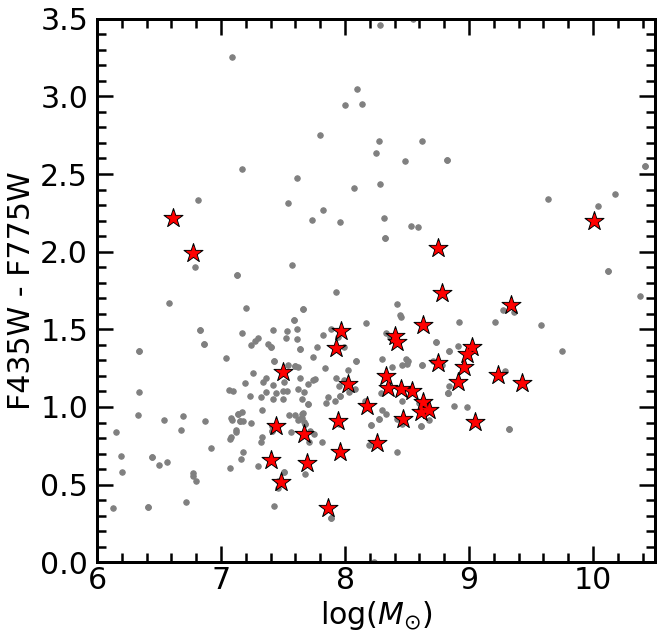

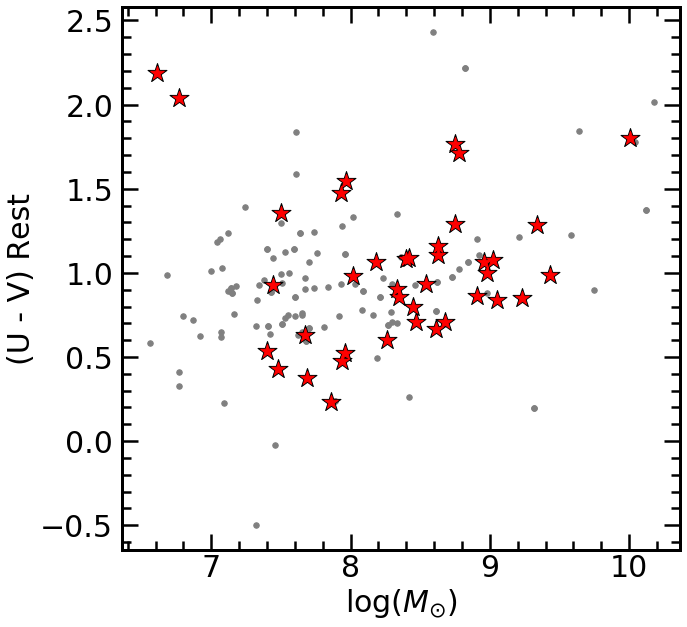

In [13]:
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(fullcleardf['td_lmass'] , -2.5*np.log10(fullcleardf['ACS_F435W_FLUX']/fullcleardf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
plt.scatter(fullmergedf['td_lmass'] , -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX']) , s = 400 , c = 'black' , marker = '*')
plt.scatter(fullmergedf['td_lmass'] , -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX']) , s = 200 , c = 'red' , marker = '*')
plt.ylabel("F435W - F775W")
plt.xlabel("log($M_{\odot})$")
plt.axis([6 , 10.5  ,  0 , 3.5])
#plt.grid()
#plt.xscale('log')
#plt.yscale('log')

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(fullcleardf['td_lmass'] , fullcleardf['restalt_restUjohnson'] - fullcleardf['restalt_restVjohnson'] , s = 30 , c = 'gray')
plt.scatter(fullmergedf['td_lmass'] , fullmergedf['restalt_restUjohnson'] - fullmergedf['restalt_restVjohnson'] , s = 400 , c = 'black' , marker = '*')
plt.scatter(fullmergedf['td_lmass'] , fullmergedf['restalt_restUjohnson'] - fullmergedf['restalt_restVjohnson'] , s = 200 , c = 'red' , marker = '*')
plt.ylabel("(U - V) Rest")
plt.xlabel("log($M_{\odot})$")
plt.show()

In [24]:
t = Table.read('3dhst.v4.1.5.master.fits.gz')
t = t[['grism_id' , 'field' , 'ra' , 'dec' , 'z_best', 'z_best_s' ,  'z_spec' , 'z_peak_phot' , 'z_max_grism']]
masterdf = t.to_pandas()

In [67]:
#display(masterdf)

In [26]:
#master[1].header

In [ ]:
mastermergedf = pd.merge(fullmergedf , masterdf , how = 'inner', left_on = 'ID' , right_on = )

In [77]:
t = fits.open('D:/GN3_34456_fixedz/GN3_34456_fixedz/GN3_34456.stack.fits')

In [81]:
t[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  178                                                  
NAXIS2  =                   64                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRPIX1  =                   90                                                  
CRPIX2  =                   33                                                  
CRVAL1  =                0.975                                                  
CD1_1   =               0.0023                                                  
CD1_2   =                  0.0                                                  
CRVAL2  =                  0

In [82]:
t = fits.open('D:/GN3_34456_fixedz/GN3_34456_fixedz/GN3_34456.full.fits')

In [89]:
t[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   52                                                  
NAXIS2  =                   52                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'COVAR   '           / extension name                                 
N       =                    8 / Number of spectrum extensions                  
DLINEID = 'SIII    '           / Line with maximum deviation                    
DLINESN =    6.551759422277304 / Maximum line deviation, sigmas                 
FLUX_000= 2.75076293888879E-16 / PaB line flux; erg / (s cm2)                   
ERR_000 = 2.86222911852922E-

In [10]:
sorted = fullmergedf.sort_values('PAB_FLUX' , ascending = False)

In [11]:
display(sorted)

,FIELD,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,PAB_SFR,PAB_SFR_ERR,UV_SFR_ERR,PAB_SFR_EX2,PAB_SFR_EX2_ERR,PAB_SFR_LL,PAB_SFR_EX2_LL,PAB_SFR_LL_1SIGMA,PAB_SFR_EX_LL_1SIGMA,SIGMA_1
6,GN3,34157,189.206826,62.321196,0.245119,0.014142,28.282754,2.688524,15962.430241,34157,...,0.701403,0.0412555,0.035539,0.678385,0.054452,-1.250334,-1.273352,-1.438161,-1.461178,7.709024
5,GN3,34456,189.339813,62.324291,0.211290,0.010113,27.507629,2.862229,15695.781592,34456,...,0.543534,0.0451587,0.041423,0.234438,0.061279,-1.396135,-1.705231,-1.583962,-1.893057,8.551415
12,GS4,27438,53.193929,-27.785795,0.113934,0.059731,23.256086,3.881706,14280.640062,27438,...,-0.118674,0.0724396,0.072379,0.721116,0.102402,-1.985426,-1.145636,-2.173252,-1.333463,7.390334
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,19.445505,2.126779,14610.064284,19221,...,-0.005105,0.0474671,0.051236,-0.279978,0.069845,-1.794139,-2.069013,-1.981966,-2.256839,8.092881
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,14.520550,2.317139,15374.278308,15610,...,0.208897,0.0692562,0.018728,-0.006275,0.071744,-1.453302,-1.668474,-1.641128,-1.856300,7.696213
2,GS3,37720,53.139106,-27.730305,0.105764,0.006804,13.412300,2.480751,14175.896964,37720,...,-0.427104,0.080273,0.068384,0.056430,0.105452,-2.054822,-1.571289,-2.242649,-1.759116,7.696213
20,GS5,43071,53.122589,-27.707908,0.160818,0.016435,6.800451,1.289854,14881.684928,43071,...,-0.326994,0.0823176,0.456947,1.393036,0.464302,-1.659747,0.060283,-1.847573,-0.127544,6.993700
7,GN3,33397,189.175470,62.314347,0.245053,0.010841,6.159068,1.908827,15961.576268,33397,...,0.039128,0.134506,0.035696,0.060551,0.139162,-1.250603,-1.229179,-1.438429,-1.417006,7.683212
13,GS4,27549,53.144713,-27.785441,0.246654,0.000706,5.946297,0.441329,15982.098673,27549,...,0.030292,0.0322111,0.039912,0.413504,0.051288,-1.244170,-0.860959,-1.431997,-1.048785,6.821180
3,GS3,41882,53.173348,-27.714964,0.237233,0.006874,5.928669,1.605505,15861.328885,41882,...,-0.009416,0.117529,0.057724,0.220431,0.130939,-1.282589,-1.052742,-1.470416,-1.240569,7.376508
